<a href="https://colab.research.google.com/github/ranjith-getgit/Herd-Mentality/blob/main/The_Pied_Piper(compiled).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Pied Piper Phenomenon (A Herd Mentality Behaviour Analysis)

The legend of the Pied Piper of Hamelin tells of a mysterious figure who, with his enchanting music, lured the town’s rats and later its children away, leading them to their doom. The townspeople, captivated by the Piper’s influence, blindly followed without question or resistance.

This tale mirrors the phenomenon of "pied piping" in financial stock markets, where investors are often drawn into following the crowd, influenced by market trends and the actions of others, rather than relying on their own judgment. Just as the townspeople were led astray by the Piper, investors can be swayed by popular sentiment, leading to irrational decision-making and market instability.

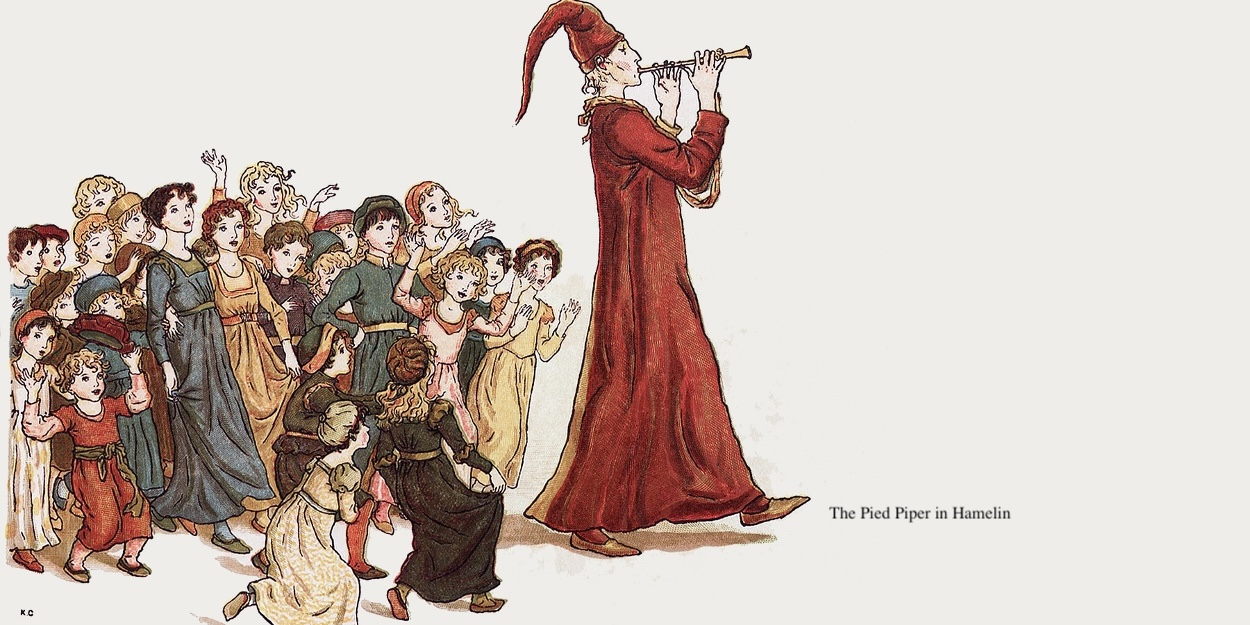

The concept was however introduced by Christie and Huang in their seminal paper during 1995 that helped identify the presence of herd mentality, if any, within the market.

In earlier times, scholars and researchers, starting with George C. Selden and Richard Thaler, have integrated psychology and behavioral sciences into finance, leading to groundbreaking theories in the field. One such theory is known as the "feedback theory" in financial markets. This theory explains that when speculative prices rise for a particular stock, the success experienced by some investors attracts others, fueling word-of-mouth enthusiasm and expectations, which further drive up the stock price. The feedback theory contributed to the understanding of herd mentality behavior in the 1990s.

"Herding" has become a recognized psychological phenomenon in today's societies. It is evident that in many aspects of our lives, we tend to follow others and overlook our own decision-making abilities. In financial markets, herding occurs when investors abandon their own judgments and mimic the actions of others. The consequences of herding can be significant, leading to increased volatility and destabilized financial markets.

This study aims to assess the presence of herd mentality in the UK stock market during the 2019 pandemic. The pandemic acted as a major influencer of herd mentality in stock markets, driving investors to follow collective behaviour in response to heightened uncertainty and market volatility. Using a quadratic regression model (with a second-degree term), the research seeks to demonstrate the non-linear relationship between the cross-sectional absolute deviation (CSAD) of stocks and the average market returns of the FTSE 100.

The models are evaluated to establish whether a low dispersion of stocks, proportional to market returns, indicates herd behavior among investors. Additionally, quantile regression is used to analyze behavior across different quantiles. The expected results were observed in asymmetric (down) market conditions during the pandemic. However, no signs of herding were detected in (up) market conditions, contradicting the theory.

The following chapters provide a detailed analysis, including data preprocessing, exploratory analysis, and evaluation of the constructed herd behavior model.

# Data Preprocessing
---
Data preprocessing can be defined as manipulation, filtration or augmentation of data before it is analysed. Raw data consists of out-of-range values, missing values amongst other issues.

The following raw data was retrieved from Refinitv Datastream consisting of daily stock (constituents) price information of FTSE 100 and its Equally Weighted Price Index.   



In [ ]:
import pandas as pd
import numpy as np

## Read File (csv.)

The file contains 784 observations with 100 daily stock price and market index (FTSE 100) data. The data is retrieved from Refinitiv Datastream.

In [ ]:
hmdf=pd.read_csv('/content/sample_data/data_ftse.csv')

In [ ]:
hmdf

,Date,FTSE 100 EQUALLY WEIGHTED - PRICE INDEX,3I GROUP,ADMIRAL GROUP,AIRTEL AFRICA,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,...,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITE GROUP,UNITED UTILITIES GROUP,VISTRY GROUP,VODAFONE GROUP,WEIR GROUP,WHITBREAD,WPP
0,01/01/19,140.86,773.4,2047.0,NaN,1740.75,783.2,1637.0,2043.0,5873,...,136.25,189.82,4108.5,806.0,736.2,830.10,152.90,1298.0,3933.92,846.6
1,02/01/19,140.89,783.6,2027.0,NaN,1703.50,770.4,1658.0,2072.0,5903,...,136.85,191.27,4143.0,806.0,747.0,828.36,154.94,1282.0,3952.82,850.0
2,03/01/19,139.19,774.0,2006.0,NaN,1667.85,738.0,1615.5,2102.0,6010,...,137.70,199.06,4121.5,806.0,750.4,812.57,156.06,1244.5,3939.08,842.2
3,04/01/19,142.64,804.4,2018.0,NaN,1749.32,785.6,1702.0,2159.0,6089,...,140.40,197.11,4152.0,813.0,761.0,827.40,157.98,1315.5,4020.69,852.6
4,07/01/19,142.98,802.4,1979.5,NaN,1763.66,809.4,1753.5,2154.0,6005,...,139.70,202.20,4105.0,825.5,752.8,832.99,157.40,1355.5,4106.61,866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,177.87,1454.5,3095.0,128.0,3040.50,1320.0,6012.0,1990.0,8611,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
780,28/12/21,177.87,1454.5,3095.0,128.0,3040.50,1320.0,6012.0,1990.0,8611,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
781,29/12/21,179.31,1467.5,3150.0,129.8,3028.00,1336.5,6120.0,2014.0,8656,...,176.75,291.05,3971.0,1082.0,1106.5,1200.50,112.64,1719.0,2968.00,1129.0
782,30/12/21,179.06,1458.0,3140.0,133.5,3019.50,1338.5,6008.0,2003.0,8673,...,175.20,291.25,3966.5,1100.0,1096.5,1188.50,112.38,1729.0,3012.00,1129.5


### Identification of Data Type

The data type for the sample is considered to be float64 which is continuous data.

In [ ]:
hmdf.dtypes

Date                                        object
FTSE 100 EQUALLY WEIGHTED - PRICE INDEX    float64
3I GROUP                                   float64
ADMIRAL GROUP                              float64
AIRTEL AFRICA                              float64
                                            ...   
VISTRY GROUP                               float64
VODAFONE GROUP                             float64
WEIR GROUP                                 float64
WHITBREAD                                  float64
WPP                                        float64
Length: 102, dtype: object

Read the first and last 5 rows of the file to identify any inconsistencies

In [ ]:
hmdf.head(5)

,Date,FTSE 100 EQUALLY WEIGHTED - PRICE INDEX,3I GROUP,ADMIRAL GROUP,AIRTEL AFRICA,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,...,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITE GROUP,UNITED UTILITIES GROUP,VISTRY GROUP,VODAFONE GROUP,WEIR GROUP,WHITBREAD,WPP
0,01/01/19,140.86,773.4,2047.0,NaN,1740.75,783.2,1637.0,2043.0,5873,...,136.25,189.82,4108.5,806.0,736.2,830.10,152.90,1298.0,3933.92,846.6
1,02/01/19,140.89,783.6,2027.0,NaN,1703.50,770.4,1658.0,2072.0,5903,...,136.85,191.27,4143.0,806.0,747.0,828.36,154.94,1282.0,3952.82,850.0
2,03/01/19,139.19,774.0,2006.0,NaN,1667.85,738.0,1615.5,2102.0,6010,...,137.70,199.06,4121.5,806.0,750.4,812.57,156.06,1244.5,3939.08,842.2
3,04/01/19,142.64,804.4,2018.0,NaN,1749.32,785.6,1702.0,2159.0,6089,...,140.40,197.11,4152.0,813.0,761.0,827.40,157.98,1315.5,4020.69,852.6
4,07/01/19,142.98,802.4,1979.5,NaN,1763.66,809.4,1753.5,2154.0,6005,...,139.70,202.20,4105.0,825.5,752.8,832.99,157.40,1355.5,4106.61,866.0


In [ ]:
hmdf.tail(5)

,Date,FTSE 100 EQUALLY WEIGHTED - PRICE INDEX,3I GROUP,ADMIRAL GROUP,AIRTEL AFRICA,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,...,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITE GROUP,UNITED UTILITIES GROUP,VISTRY GROUP,VODAFONE GROUP,WEIR GROUP,WHITBREAD,WPP
779,27/12/21,177.87,1454.5,3095.0,128.0,3040.5,1320.0,6012.0,1990.0,8611,...,175.20,287.90,3952.5,1073.0,1093.0,1178.5,112.54,1709.5,2999.0,1120.0
780,28/12/21,177.87,1454.5,3095.0,128.0,3040.5,1320.0,6012.0,1990.0,8611,...,175.20,287.90,3952.5,1073.0,1093.0,1178.5,112.54,1709.5,2999.0,1120.0
781,29/12/21,179.31,1467.5,3150.0,129.8,3028.0,1336.5,6120.0,2014.0,8656,...,176.75,291.05,3971.0,1082.0,1106.5,1200.5,112.64,1719.0,2968.0,1129.0
782,30/12/21,179.06,1458.0,3140.0,133.5,3019.5,1338.5,6008.0,2003.0,8673,...,175.20,291.25,3966.5,1100.0,1096.5,1188.5,112.38,1729.0,3012.0,1129.5
783,31/12/21,178.65,1449.0,3157.0,133.7,3016.0,1338.5,5942.0,2008.0,8678,...,175.50,289.90,3945.5,1110.5,1089.0,1184.0,112.26,1711.5,2995.0,1119.5


### Treating columns with an #ERROR

One column has been identified without any pricing data, marked as #ERROR by Refinitiv. This stock price column will be removed.

In [ ]:
hmdf.columns=[f'#ERROR_{i}' if x=='#ERROR' else x for i, x in enumerate(hmdf.columns)]

In [ ]:
hmdf_error='#ERROR_41'
hmdf_error_=hmdf_error.split(',')

In [ ]:
hmdf=hmdf.drop(columns=hmdf_error_)

In [ ]:
hmdf

,Date,FTSE 100 EQUALLY WEIGHTED - PRICE INDEX,3I GROUP,ADMIRAL GROUP,AIRTEL AFRICA,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,...,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITE GROUP,UNITED UTILITIES GROUP,VISTRY GROUP,VODAFONE GROUP,WEIR GROUP,WHITBREAD,WPP
0,01/01/19,140.86,773.4,2047.0,NaN,1740.75,783.2,1637.0,2043.0,5873,...,136.25,189.82,4108.5,806.0,736.2,830.10,152.90,1298.0,3933.92,846.6
1,02/01/19,140.89,783.6,2027.0,NaN,1703.50,770.4,1658.0,2072.0,5903,...,136.85,191.27,4143.0,806.0,747.0,828.36,154.94,1282.0,3952.82,850.0
2,03/01/19,139.19,774.0,2006.0,NaN,1667.85,738.0,1615.5,2102.0,6010,...,137.70,199.06,4121.5,806.0,750.4,812.57,156.06,1244.5,3939.08,842.2
3,04/01/19,142.64,804.4,2018.0,NaN,1749.32,785.6,1702.0,2159.0,6089,...,140.40,197.11,4152.0,813.0,761.0,827.40,157.98,1315.5,4020.69,852.6
4,07/01/19,142.98,802.4,1979.5,NaN,1763.66,809.4,1753.5,2154.0,6005,...,139.70,202.20,4105.0,825.5,752.8,832.99,157.40,1355.5,4106.61,866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,177.87,1454.5,3095.0,128.0,3040.50,1320.0,6012.0,1990.0,8611,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
780,28/12/21,177.87,1454.5,3095.0,128.0,3040.50,1320.0,6012.0,1990.0,8611,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
781,29/12/21,179.31,1467.5,3150.0,129.8,3028.00,1336.5,6120.0,2014.0,8656,...,176.75,291.05,3971.0,1082.0,1106.5,1200.50,112.64,1719.0,2968.00,1129.0
782,30/12/21,179.06,1458.0,3140.0,133.5,3019.50,1338.5,6008.0,2003.0,8673,...,175.20,291.25,3966.5,1100.0,1096.5,1188.50,112.38,1729.0,3012.00,1129.5


### Drop Missing Values (NaN)

Drop stock price columns with missing values which are greater than 1/20th (0.05) the sample size: **4 stocks** were identified

In [ ]:
hmdf_dropc="AIRTEL AFRICA, DARKTRACE, ENDEAVOUR MINING (LON), M&G"
hmdf_dropc_= [x.strip() for x in hmdf_dropc.split(',')]

In [ ]:
hmdf=hmdf.drop(columns=hmdf_dropc_)

In [ ]:
hmdf

,Date,FTSE 100 EQUALLY WEIGHTED - PRICE INDEX,3I GROUP,ADMIRAL GROUP,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,AUTO TRADER GROUP,...,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITE GROUP,UNITED UTILITIES GROUP,VISTRY GROUP,VODAFONE GROUP,WEIR GROUP,WHITBREAD,WPP
0,01/01/19,140.86,773.4,2047.0,1740.75,783.2,1637.0,2043.0,5873,454.8,...,136.25,189.82,4108.5,806.0,736.2,830.10,152.90,1298.0,3933.92,846.6
1,02/01/19,140.89,783.6,2027.0,1703.50,770.4,1658.0,2072.0,5903,441.4,...,136.85,191.27,4143.0,806.0,747.0,828.36,154.94,1282.0,3952.82,850.0
2,03/01/19,139.19,774.0,2006.0,1667.85,738.0,1615.5,2102.0,6010,440.5,...,137.70,199.06,4121.5,806.0,750.4,812.57,156.06,1244.5,3939.08,842.2
3,04/01/19,142.64,804.4,2018.0,1749.32,785.6,1702.0,2159.0,6089,445.8,...,140.40,197.11,4152.0,813.0,761.0,827.40,157.98,1315.5,4020.69,852.6
4,07/01/19,142.98,802.4,1979.5,1763.66,809.4,1753.5,2154.0,6005,448.4,...,139.70,202.20,4105.0,825.5,752.8,832.99,157.40,1355.5,4106.61,866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,177.87,1454.5,3095.0,3040.50,1320.0,6012.0,1990.0,8611,724.4,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
780,28/12/21,177.87,1454.5,3095.0,3040.50,1320.0,6012.0,1990.0,8611,724.4,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
781,29/12/21,179.31,1467.5,3150.0,3028.00,1336.5,6120.0,2014.0,8656,730.4,...,176.75,291.05,3971.0,1082.0,1106.5,1200.50,112.64,1719.0,2968.00,1129.0
782,30/12/21,179.06,1458.0,3140.0,3019.50,1338.5,6008.0,2003.0,8673,735.2,...,175.20,291.25,3966.5,1100.0,1096.5,1188.50,112.38,1729.0,3012.00,1129.5


## Clean Data File (csv.)

The final clean data file consisits of 784 daily observations with 97 stock/market daily stock price data

In [ ]:
hmdf.to_csv('dataclean_ftse.csv')

# Exploratory Data Analysis
---
EDA is used to analyse and investigate data sets to summarise their main characteristics. EDA is generally conducted using data visualisation techniques in contrast to the formal modelling and traditional hypothesis testing




In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy import stats
from scipy.stats import norm
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Read clean file (csv.)

In [ ]:
hmdf=pd.read_csv('/content/sample_data/dataclean_ftse.csv')

In [ ]:
hmdf.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
hmdf

,Date,FTSE,3I GROUP,ADMIRAL GROUP,ANGLO AMERICAN,ANTOFAGASTA,ASHTEAD GROUP,ASSOCIATED BRIT.FOODS,ASTRAZENECA,AUTO TRADER GROUP,...,TAYLOR WIMPEY,TESCO,UNILEVER (UK),UNITE GROUP,UNITED UTILITIES GROUP,VISTRY GROUP,VODAFONE GROUP,WEIR GROUP,WHITBREAD,WPP
0,01/01/19,140.86,773.4,2047.0,1740.75,783.2,1637.0,2043.0,5873,454.8,...,136.25,189.82,4108.5,806.0,736.2,830.10,152.90,1298.0,3933.92,846.6
1,02/01/19,140.89,783.6,2027.0,1703.50,770.4,1658.0,2072.0,5903,441.4,...,136.85,191.27,4143.0,806.0,747.0,828.36,154.94,1282.0,3952.82,850.0
2,03/01/19,139.19,774.0,2006.0,1667.85,738.0,1615.5,2102.0,6010,440.5,...,137.70,199.06,4121.5,806.0,750.4,812.57,156.06,1244.5,3939.08,842.2
3,04/01/19,142.64,804.4,2018.0,1749.32,785.6,1702.0,2159.0,6089,445.8,...,140.40,197.11,4152.0,813.0,761.0,827.40,157.98,1315.5,4020.69,852.6
4,07/01/19,142.98,802.4,1979.5,1763.66,809.4,1753.5,2154.0,6005,448.4,...,139.70,202.20,4105.0,825.5,752.8,832.99,157.40,1355.5,4106.61,866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,177.87,1454.5,3095.0,3040.50,1320.0,6012.0,1990.0,8611,724.4,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
780,28/12/21,177.87,1454.5,3095.0,3040.50,1320.0,6012.0,1990.0,8611,724.4,...,175.20,287.90,3952.5,1073.0,1093.0,1178.50,112.54,1709.5,2999.00,1120.0
781,29/12/21,179.31,1467.5,3150.0,3028.00,1336.5,6120.0,2014.0,8656,730.4,...,176.75,291.05,3971.0,1082.0,1106.5,1200.50,112.64,1719.0,2968.00,1129.0
782,30/12/21,179.06,1458.0,3140.0,3019.50,1338.5,6008.0,2003.0,8673,735.2,...,175.20,291.25,3966.5,1100.0,1096.5,1188.50,112.38,1729.0,3012.00,1129.5


## Data Normalisation

Data normalisation is a process to convert the data to a standard format, also known as *'standardisation'*. It can be achieved by calculating daily returns for each stock price & market index using the logarithmic function

In [ ]:
returns_hmdf = pd.DataFrame() # Creation of an empty df to store the ln(logarithmic) values
returns_hmdf['Date'] = hmdf['Date'] # The 'Date' column will be consistent in the new df
for column in hmdf.columns[1:]:  # Skip the 'Date' column
    returns_hmdf[f'{column}_returns'] = np.log(hmdf[column] / hmdf[column].shift(1)) # Returns calculation using the ln function

In [ ]:
returns_hmdf

,Date,FTSE_returns,3I GROUP_returns,ADMIRAL GROUP_returns,ANGLO AMERICAN_returns,ANTOFAGASTA_returns,ASHTEAD GROUP_returns,ASSOCIATED BRIT.FOODS_returns,ASTRAZENECA_returns,AUTO TRADER GROUP_returns,...,TAYLOR WIMPEY_returns,TESCO_returns,UNILEVER (UK)_returns,UNITE GROUP_returns,UNITED UTILITIES GROUP_returns,VISTRY GROUP_returns,VODAFONE GROUP_returns,WEIR GROUP_returns,WHITBREAD_returns,WPP_returns
0,01/01/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02/01/19,0.000213,0.013102,-0.009818,-0.021631,-0.016478,0.012747,0.014095,0.005095,-0.029906,...,0.004394,0.007610,0.008362,0.000000,0.014563,-0.002098,0.013254,-0.012403,0.004793,0.004008
2,03/01/19,-0.012140,-0.012327,-0.010414,-0.021150,-0.042966,-0.025968,0.014375,0.017964,-0.002041,...,0.006192,0.039920,-0.005203,0.000000,0.004541,-0.019246,0.007203,-0.029688,-0.003482,-0.009219
3,04/01/19,0.024484,0.038525,0.005964,0.047692,0.062504,0.052160,0.026756,0.013059,0.011960,...,0.019418,-0.009844,0.007373,0.008647,0.014027,0.018086,0.012228,0.055483,0.020506,0.012273
4,07/01/19,0.002381,-0.002489,-0.019263,0.008164,0.029845,0.029810,-0.002319,-0.013891,0.005815,...,-0.004998,0.025495,-0.011384,0.015258,-0.010834,0.006733,-0.003678,0.029954,0.021144,0.015594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
780,28/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
781,29/12/21,0.008063,0.008898,0.017615,-0.004120,0.012423,0.017805,0.011988,0.005212,0.008249,...,0.008808,0.010882,0.004670,0.008353,0.012276,0.018496,0.000888,0.005542,-0.010391,0.008004
782,30/12/21,-0.001395,-0.006495,-0.003180,-0.002811,0.001495,-0.018470,-0.005477,0.001962,0.006550,...,-0.008808,0.000687,-0.001134,0.016499,-0.009079,-0.010046,-0.002311,0.005800,0.014716,0.000443


Remove first row consisting of 'NaN' values

In [ ]:
returns_hmdf.dropna(inplace=True)
returns_hmdf

,Date,FTSE_returns,3I GROUP_returns,ADMIRAL GROUP_returns,ANGLO AMERICAN_returns,ANTOFAGASTA_returns,ASHTEAD GROUP_returns,ASSOCIATED BRIT.FOODS_returns,ASTRAZENECA_returns,AUTO TRADER GROUP_returns,...,TAYLOR WIMPEY_returns,TESCO_returns,UNILEVER (UK)_returns,UNITE GROUP_returns,UNITED UTILITIES GROUP_returns,VISTRY GROUP_returns,VODAFONE GROUP_returns,WEIR GROUP_returns,WHITBREAD_returns,WPP_returns
1,02/01/19,0.000213,0.013102,-0.009818,-0.021631,-0.016478,0.012747,0.014095,0.005095,-0.029906,...,0.004394,0.007610,0.008362,0.000000,0.014563,-0.002098,0.013254,-0.012403,0.004793,0.004008
2,03/01/19,-0.012140,-0.012327,-0.010414,-0.021150,-0.042966,-0.025968,0.014375,0.017964,-0.002041,...,0.006192,0.039920,-0.005203,0.000000,0.004541,-0.019246,0.007203,-0.029688,-0.003482,-0.009219
3,04/01/19,0.024484,0.038525,0.005964,0.047692,0.062504,0.052160,0.026756,0.013059,0.011960,...,0.019418,-0.009844,0.007373,0.008647,0.014027,0.018086,0.012228,0.055483,0.020506,0.012273
4,07/01/19,0.002381,-0.002489,-0.019263,0.008164,0.029845,0.029810,-0.002319,-0.013891,0.005815,...,-0.004998,0.025495,-0.011384,0.015258,-0.010834,0.006733,-0.003678,0.029954,0.021144,0.015594
5,08/01/19,0.014236,0.005221,0.020253,-0.008965,0.005176,0.046792,0.035123,-0.017979,0.005116,...,0.004998,0.027271,-0.001341,0.025121,0.004242,0.025343,-0.011502,0.021169,0.015980,0.009653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,27/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
780,28/12/21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
781,29/12/21,0.008063,0.008898,0.017615,-0.004120,0.012423,0.017805,0.011988,0.005212,0.008249,...,0.008808,0.010882,0.004670,0.008353,0.012276,0.018496,0.000888,0.005542,-0.010391,0.008004
782,30/12/21,-0.001395,-0.006495,-0.003180,-0.002811,0.001495,-0.018470,-0.005477,0.001962,0.006550,...,-0.008808,0.000687,-0.001134,0.016499,-0.009079,-0.010046,-0.002311,0.005800,0.014716,0.000443


Save file (csv.)

In [ ]:
returns_hmdf.to_csv('hmdf_ftse.csv')

## Calculation of **Cross Sectional Absolute Deviation (CSAD)**

Calculation of the absolute deviation/dispersion of all stocks from the market return (FTSE 100)


In [ ]:
returns_hmdf['CSAD'] = returns_hmdf.apply(lambda row: np.mean(np.abs(row[1:] - row['FTSE_returns'])), axis=1)
# Using apply function to rows (axis=1), CSAD is calculated. Formulae: CSAD_t = (1/N) * sum(|R_i,t - R_m,t|)

In [ ]:
hmdf1=returns_hmdf[['CSAD','FTSE_returns']]
hmdf1

,CSAD,FTSE_returns
1,0.011418,0.000213
2,0.014094,-0.012140
3,0.013923,0.024484
4,0.012555,0.002381
5,0.013355,0.014236
...,...,...
779,0.000000,0.000000
780,0.000000,0.000000
781,0.009025,0.008063
782,0.006122,-0.001395


Save file (csv.)

In [ ]:
hmdf1.to_csv('hmdf1_ftse.csv')

## Descriptive Analysis

### Descriptive stats for CSAD (y) and FTSE 100 (x)

In [ ]:
hmdf1.describe().T

,count,mean,std,min,25%,50%,75%,max
CSAD,783.0,0.011502,0.006199,0.000000,0.008378,0.010252,0.012746,0.062258
FTSE_returns,783.0,0.000304,0.012713,-0.113212,-0.004840,0.000464,0.006187,0.088727


**Skewness and Kurtosis**

In [ ]:
hmdf1_skewness = skew(hmdf1['CSAD'])
hmdf1_kurtosis = kurtosis(hmdf1['CSAD'])
print(f'Skewness CSAD: {hmdf1_skewness:.6f}')
print(f'Kurtosis CSAD: {hmdf1_kurtosis:.6f}')
hmdf1_skewness = skew(hmdf1['FTSE_returns'])
hmdf1_kurtosis = kurtosis(hmdf1['FTSE_returns'])
print(f'Skewness FTSE 100: {hmdf1_skewness:.6f}')
print(f'Kurtosis FTSE 100: {hmdf1_kurtosis:.6f}')

Skewness CSAD: 3.079773
Kurtosis CSAD: 16.345325
Skewness FTSE 100: -1.022160
Kurtosis FTSE 100: 13.711164


### Descriptive stats for CSAD (y) and FTSE 100 (x) - Pre & Post COVID-19

In [ ]:
covid_event_date = '2020-02-26'
hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])
pre_event = hmdf1[hmdf1['Date'] < covid_event_date]
post_event = hmdf1[hmdf1['Date'] >= covid_event_date]
pre_event_stats = pre_event[['CSAD', 'FTSE_returns']].describe()
post_event_stats = post_event[['CSAD', 'FTSE_returns']].describe()
print("Pre-COVID-19 Statistics:")
print(pre_event_stats)
print("Post-COVID-19 Statistics:")
print(post_event_stats)

Pre-COVID-19 Statistics:
             CSAD  FTSE_returns
count  301.000000    301.000000
mean     0.009679      0.000315
std      0.003695      0.009132
min      0.000000     -0.046381
25%      0.007875     -0.004155
50%      0.009037      0.000501
75%      0.010876      0.005530
max      0.032144      0.027473

Post-COVID-19 Statistics:
             CSAD  FTSE_returns
count  482.000000    482.000000
mean     0.012640      0.000296
std      0.007111      0.014517
min      0.000000     -0.113212
25%      0.009190     -0.005058
50%      0.011032      0.000447
75%      0.014377      0.006655
max      0.062258      0.088727


<ipython-input-36-e22c4419003d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])
<ipython-input-36-e22c4419003d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])


**Skewness and Kurtosis**

In [ ]:
# Calculate skewness and kurtosis
def calculate_skewness_kurtosis(df, columns):
    skewness = {}
    kurtosis_vals = {}
    for col in columns:
        skewness[col] = skew(df[col].dropna())
        kurtosis_vals[col] = kurtosis(df[col].dropna())
    return pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis_vals})

# Columns to analyze
columns = ['CSAD', 'FTSE_returns']

# Calculate for pre-event and post-event
pre_event_skewness_kurtosis = calculate_skewness_kurtosis(pre_event, columns)
post_event_skewness_kurtosis = calculate_skewness_kurtosis(post_event, columns)

# Combine results into a single DataFrame
combined_skewness_kurtosis = pd.concat([
    pre_event_skewness_kurtosis.add_prefix('Before-COVID-19 '),
    post_event_skewness_kurtosis.add_prefix('During-COVID-19 ')
], axis=1)

# Display the combined skewness and kurtosis in a tabular format
print(combined_skewness_kurtosis)

              Pre-COVID-19 Skewness  Pre-COVID-19 Kurtosis  \
CSAD                       1.885745               9.878417   
FTSE_returns              -0.754412               3.432174   

              Post-COVID-19 Skewness  Post-COVID-19 Kurtosis  
CSAD                        2.807588               12.729948  
FTSE_returns               -0.998547               12.362213  


### Density Plots: to evaluate normal distribution

It is evident from the graphs below that CSAD and FTSE 100 data is not normallly distributed, consists of long tails (skewness) and peakness (kurtosis) in the sample.

A right-tailed CSAD indicate that dispersion amongst stocks in the sample increases over time.

Text(0, 0.5, 'Density')

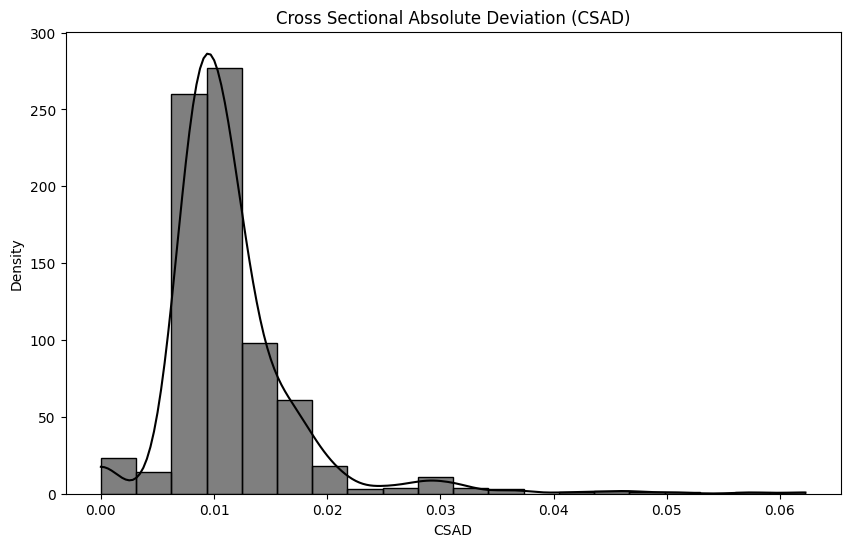

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(hmdf1['CSAD'], kde=True, color='black', bins=20)
plt.title('Cross Sectional Absolute Deviation (CSAD)')
plt.xlabel('CSAD')
plt.ylabel('Density')

A left-tailed FTSE 100 indicate that the returns within FTSE 100 depreciates over time. The dispersion of stocks (CSAD) is consistent as investors deny to conform to the market (FTSE 100).

But, this cannot be considered conclusive as CSAD is in absolute value terms and a detailed regression analysis must be conducted with absolute values of FTSE to identify the herding behaviour.

Text(0, 0.5, 'Density')

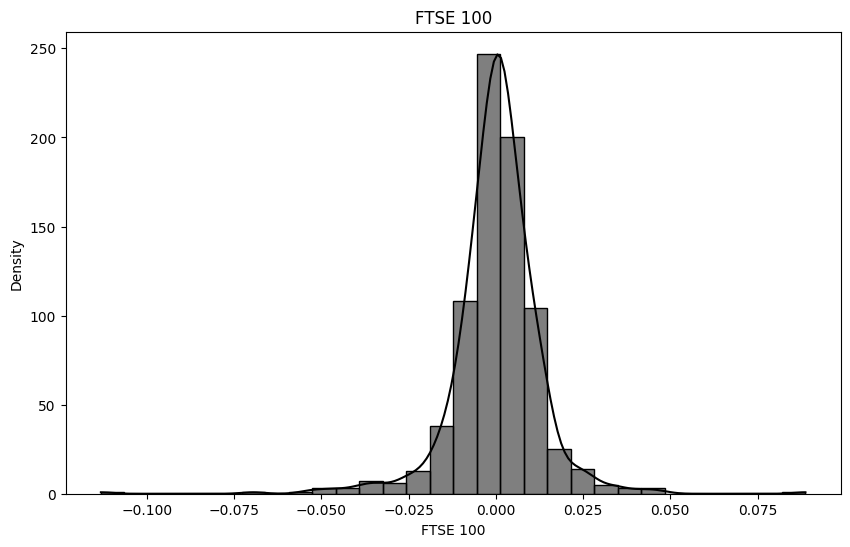

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(hmdf1['FTSE_returns'], kde=True, color='black', bins=30)
plt.title('FTSE 100')
plt.xlabel('FTSE 100')
plt.ylabel('Density')

### QQ Plots: to evaluate normal distribution

A QQ plot is a probability plot used to determine how close a sample is from the normal distribution. A QQ plot orders the z-scores from low to high, and plot each values z-score on the y-axis, the x-axis is the corresponding quantile of the normal distribution.

If the points fall on the diagonal line, then the sample distribution can be considered close to normal.

It is observed that the distribution is not normal for CSAD with the presence of outliers (long-tails) in the lower and higher quantile regions.

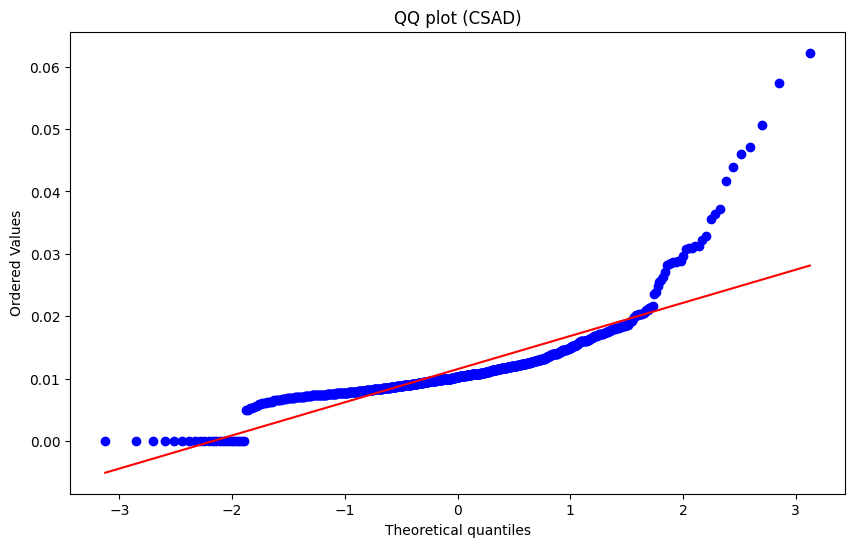

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(hmdf1['CSAD'], dist="norm", plot=plt)
plt.title('QQ plot (CSAD)')
plt.show()

It is observed that the distribution is not normal for FTSE 100 with the presence of outliers (long-tails) in the lower and higher quantile regions.

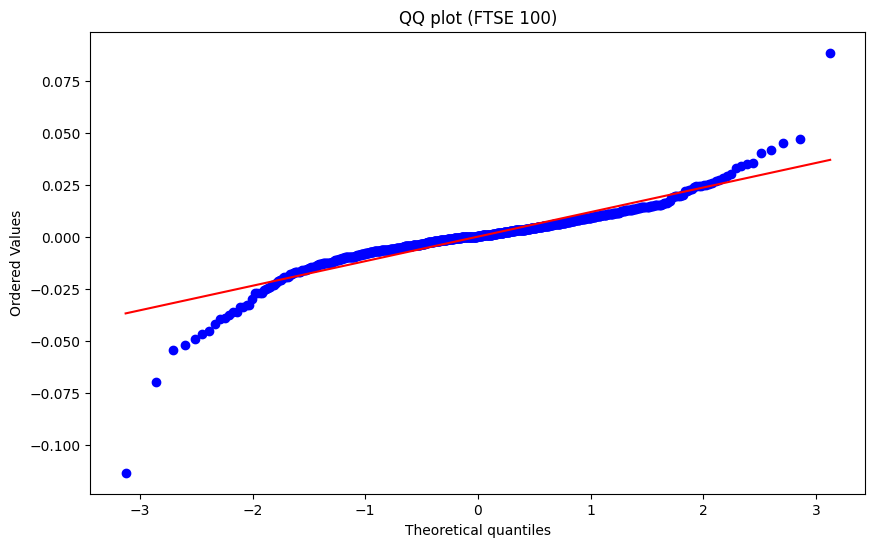

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(hmdf1['FTSE_returns'], dist="norm", plot=plt)
plt.title('QQ plot (FTSE 100)')
plt.show()

### Stationarity Plots

Graphically represent stationarity for CSAD and FTSE 100.

<ipython-input-58-71ea969ef2c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])


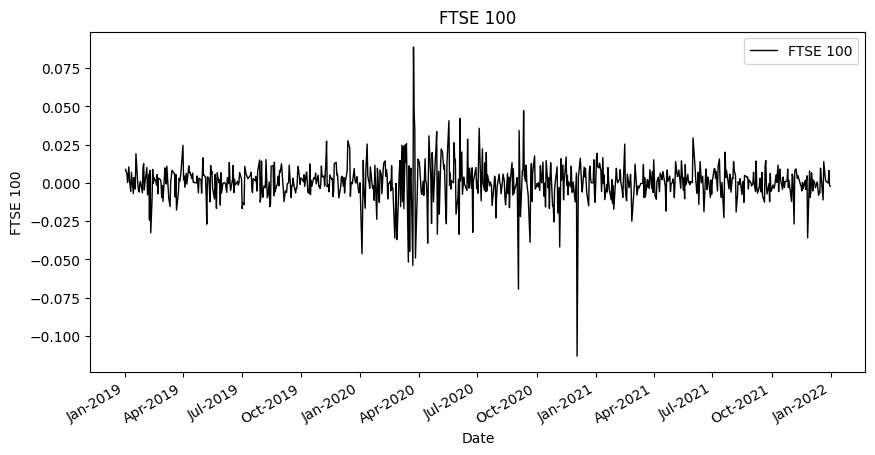

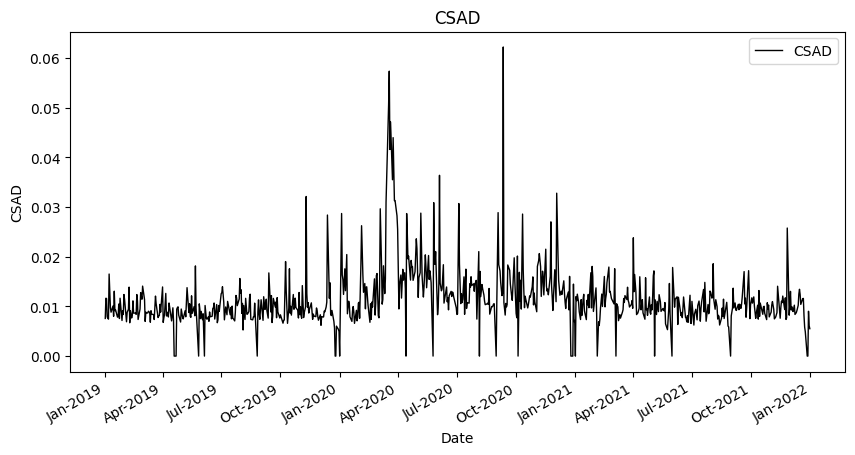

In [ ]:
hmdf1['Date'] = pd.to_datetime(hmdf1['Date'])
# Line graph for FTSE100
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='FTSE_returns', data=hmdf1, color='black', linewidth=1)
plt.title('FTSE 100')
plt.ylabel('FTSE 100')
plt.xlabel('Date')

# Formatting x-axis to Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Interval for 3 months
plt.gcf().autofmt_xdate()

plt.legend(['FTSE 100'])
plt.show()

# Line graph for CSAD
plt.figure(figsize=(10, 5))
sns.lineplot(x='Date', y='CSAD', data=hmdf1, color='black', linewidth=1)
plt.title('CSAD')
plt.ylabel('CSAD')
plt.xlabel('Date')

# Formatting x-axis to Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Interval for 3 months
plt.gcf().autofmt_xdate()

plt.legend(['CSAD'])
plt.show()

### Pearson's Correlation

The following correlation coefficient gives an estimate of the correlation between 2 variables that lies on the same scale.

CSAD and FTSE 100 have no correlation to each other as the relationship is considered to be non-linear in nature. Correlation coefficient is not a useful metric to capture the relation for non-linear behaviour.

In [ ]:
hmdf1.corr().style.background_gradient(cmap='icefire')

,CSAD,FTSE_returns
CSAD,1.000000,0.003204
FTSE_returns,0.003204,1.000000


### Spearman's Correlation

Pearson's correlation is considered to have a major limitation. It measures the association between 2 continuous variables (linear relationship) and penalises a non-linear yet monotonic association.

A Spearman's correlation is a better alternative as it assess the monotonocity, which can be linear as well as non-lienar.

As observed below, CSAD and FTSE 100 returns have a negative relation with a Spearman correlation method. The non-linearity in the observations are captured accurately unlike the Pearson's correlation. A negative relation indicates presence of herding in the sample observations for the period.

In [ ]:
hmdf1.corr(method='spearman').style.background_gradient(cmap='icefire')

,CSAD,FTSE_returns
CSAD,1.000000,-0.015558
FTSE_returns,-0.015558,1.000000


**Scatter plot to visualise correlation**

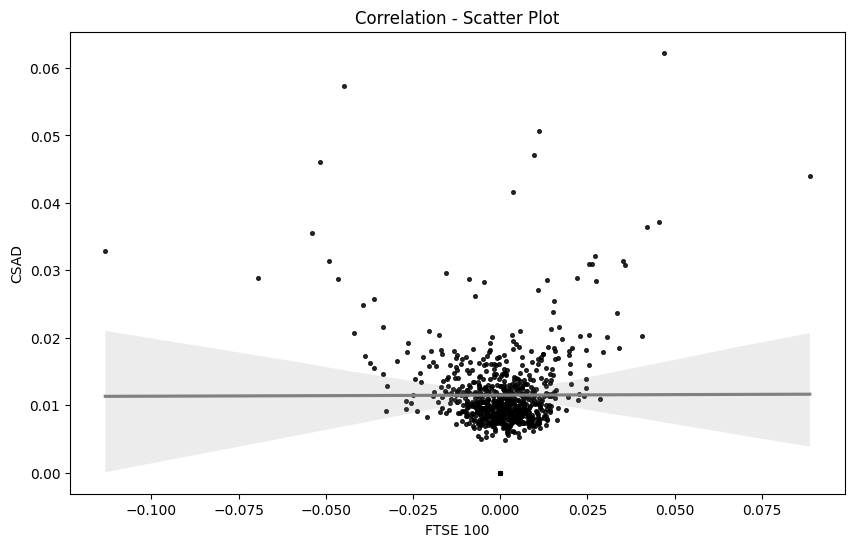

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='FTSE_returns', y='CSAD', data=hmdf1, color='black', scatter_kws={'s': 7}, line_kws={'color': 'grey'})
plt.title("Correlation - Scatter Plot")
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.show()

**Contour plot to visualise correlation**

The contour plot provides a better portrayal of the formation of a big cluster in the lower region indicating low dispersions and more than few high deviating obervations.

This could suggest a detection of herd behaviour during the sample time period. A formal inferential (regression) analysis must be conducted to get to a conclusive evidence.

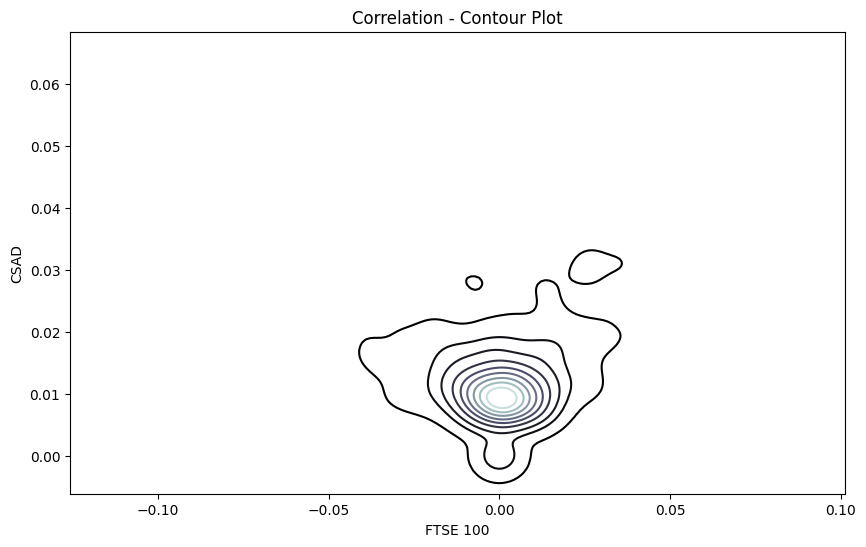

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x='FTSE_returns', y='CSAD', data=hmdf1, cmap="bone", fill=False)
plt.title("Correlation - Contour Plot")
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.show()

#Sampling Distribution
---
A sample distribution of a statistic is the distribution of some sample over many samples drawn from the same population. The purpose is to make inferences from small sample to a large population.

## Gosset's T-Distribution & T-Statistics (two-tailed)

Student's T-Distribution is a continuous probability distribution that generates the standard normal distribution.

The t-distribution assess the statistical significance of the difference between two sample means. A difference in mean indicate that the original samples are independent to each other.

The following t-test is conducted to assess the difference between the means between CSAD and FTSE 100.

**Test Hypothesis:**

*   Ho: No observed difference in means of the variables
*   Ha: Observed difference in means of the variables

In [ ]:
# Convert columns to numerical
hmdf1.loc[:,'CSAD'] = pd.to_numeric(hmdf1['CSAD'], errors='coerce')
hmdf1.loc[:,'FTSE_returns'] = pd.to_numeric(hmdf1['FTSE_returns'], errors='coerce')
# Columns as numerical arrays
CSAD = hmdf1['CSAD'].values
FTSE100_returns = hmdf1['FTSE_returns'].values

# t-test
t_stat, p_value = stats.ttest_rel(CSAD,FTSE100_returns)
print(f"t-stats: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference between CSAD and FTSE 100 is statistically significant.")
else:
    print("The difference between CSAD and FTSE 100  is not statistically significant.")

t-stats: 22.1835
p-value: 0.0000
The difference between CSAD and FTSE 100 is statistically significant.


The difference is statistically significant indicating that the CSAD sample is independant to the FTSE 100 sample.




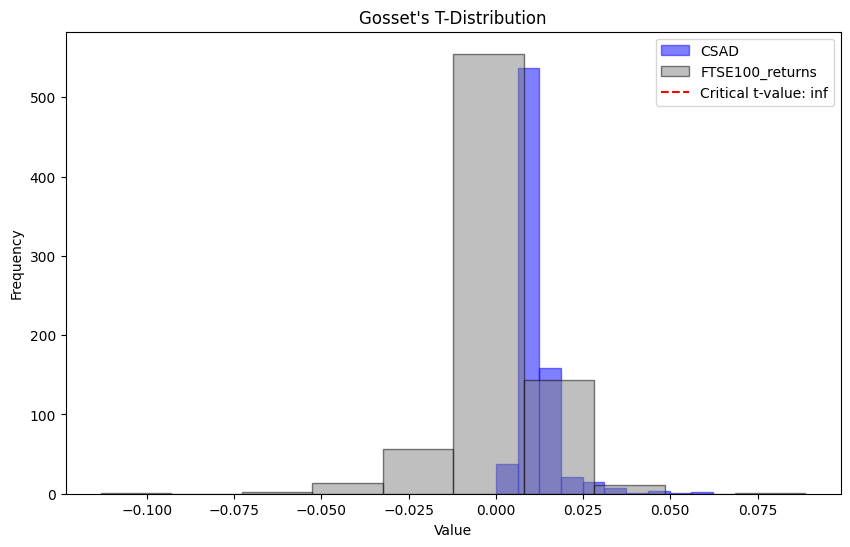

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(CSAD, bins=10, alpha=0.5, label='CSAD', color='blue', edgecolor='blue')
plt.hist(FTSE100_returns, bins=10, alpha=0.5, label='FTSE100_returns', color='grey', edgecolor='black')

# Critical t-value
critical_t_value = stats.t.ppf(1, df=len(CSAD) + len(FTSE100_returns)- 2)  # for alpha=0.05 (two-tailed)
plt.axvline(x=critical_t_value, color='red', linestyle='--', label=f'Critical t-value: {critical_t_value:.2f}')

plt.title("Gosset's T-Distribution")
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()

### Permutation Test with Gosset's T-Distribution (without replacement)

Through a permutation test, a random chance for sampling distribution is intended to be dismissed. By utilising the above hypothesis, a permutation test can be conducted.

Steps involved for a permutation test are,

1.   Calculate the observed differences in mean for the 2 variables
2.   Combine the results from the 2 variables in a single dataset

1.  Shuffle the combined data, then randomly draw a resample (without replacement)
2.  Calculate difference in means for the permutation sample, this constitutes the a permutation iteration

1.   Repeat the *'R'* times to yield permutation distribution
2.   Calculate the p-value based on permutation sample

In [ ]:
# Observed difference in means
obs_diff_means = np.mean(CSAD) - np.mean(FTSE100_returns)

# Number of permutation samples
num_permutations = 1000

# Combine both datasets
combined_data = np.concatenate((CSAD, FTSE100_returns))

# Initialize array to store permutation sample statistics
perm_diff_means = np.zeros(num_permutations)

# Permutation testing
for i in range(num_permutations):
    # Permute the combined data
    np.random.shuffle(combined_data)

    # Split the permuted data into two samples
    perm_sample_1 = combined_data[:len(CSAD)]
    perm_sample_2 = combined_data[len(CSAD):]

    # Difference in means for permutation samples
    perm_diff_means[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)

# p-value based on permutation samples
p_value = np.mean(np.abs(perm_diff_means) >= np.abs(obs_diff_means))
print(f"p-value: {p_value:.6f}")

print(f"Observed difference in means: {obs_diff_means:.6f}")

# Compare with significance level (alpha = 0.05)
if p_value < 0.05:
    print("Observed difference is statistically significant.")
else:
    print("Observed difference is not statistically significant.")

p-value: 0.000000
Observed difference in means: 0.011198
Observed difference is statistically significant.


It is observed that the observed difference is statistically significant and do not lie within the set of the permuted differences, thus proving the sampling results are not by a random chance.

Generally, the observed difference lies far away from the permuted combinations.

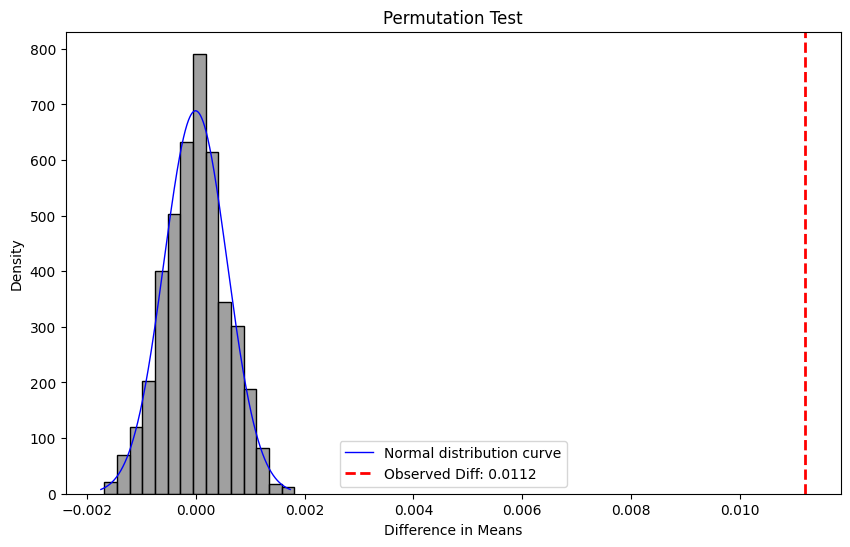

In [ ]:
# Mean and standard deviation of permutation differences
mean_perm_diff = np.mean(perm_diff_means)
std_perm_diff = np.std(perm_diff_means)

# Generate x values for normal distribution curve
x_values = np.linspace(mean_perm_diff - 3*std_perm_diff, mean_perm_diff + 3*std_perm_diff, 1000)
y_values = norm.pdf(x_values, mean_perm_diff, std_perm_diff)

# Plotting the permutation test results
plt.figure(figsize=(10, 6))
sns.histplot(perm_diff_means, bins=15, kde=False, color='grey', edgecolor='black', stat='density')
plt.plot(x_values, y_values, color='blue', linewidth=1, label='Normal distribution curve')
plt.axvline(obs_diff_means, color='red', linestyle='dashed', linewidth=2, label=f'Observed Diff: {obs_diff_means:.4f}')
plt.title('Permutation Test')
plt.xlabel('Difference in Means')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

### Bootstrap Permutation Test with Gosset's T-Distribution (with replacement)

A bootstrap permutation test, is an effective sampling technique where additional samples are obtained with replacement from the sample itself and recalculate the statistic for each sample.

A bootstrap can replicate the original sample thousands or millions of times so that a hypothetical population is generated that embodies all the knowledge from the original sample.

By utilising the above hypothesis, a bootstrap permutation test can be conducted.

Steps involved for bootstrap permutation test are,


1.   Calculate the observed difference in means of the 2 variables
2.   Draw a sample value, record, replace it

1.   Repeat *'n'* times
2.   Record the mean of the *'n'* resampled values

1.   Repeat 1-3 *'R'* times (iterations of the bootstrap)
2.   Use R results to calculate

*   standard deviation
*   find confidence interval


In [ ]:
# Observed difference in means
obs_diff_means = np.mean(CSAD) - np.mean(FTSE100_returns)

# Number of bootstrap samples
num_bootstraps = 1000

# Initialize array to store bootstrap sample statistics
bootstrap_diff_means = np.zeros(num_bootstraps)

# Bootstrapping
for i in range(num_bootstraps):
    # Generate bootstrap samples with replacement
    bootstrap_CSAD = np.random.choice(CSAD, size=len(CSAD), replace=True)
    bootstrap_FTSE100 = np.random.choice(FTSE100_returns, size=len(FTSE100_returns), replace=True)

    # Difference in means for bootstrap samples
    bootstrap_diff_means[i] = np.mean(bootstrap_CSAD) - np.mean(bootstrap_FTSE100)

# p-value based on bootstrap samples
p_value = np.mean(np.abs(bootstrap_diff_means) >= np.abs(obs_diff_means))
print(f"p-value: {p_value:.6f}")

print(f"Observed difference in means: {obs_diff_means:.6f}")

# Compare with significance level (alpha = 0.05)
if p_value < 0.05:
    print("Observed difference is statistically significant.")
else:
    print("Observed difference is not statistically significant.")

p-value: 0.547000
Observed difference in means: 0.011198
Observed difference is not statistically significant.


It is observed that the observed difference is statistically insignificant and do lie within the set of the iterated bootstrap differences. The results are not satisfactory to prove that it occurred by random chance.

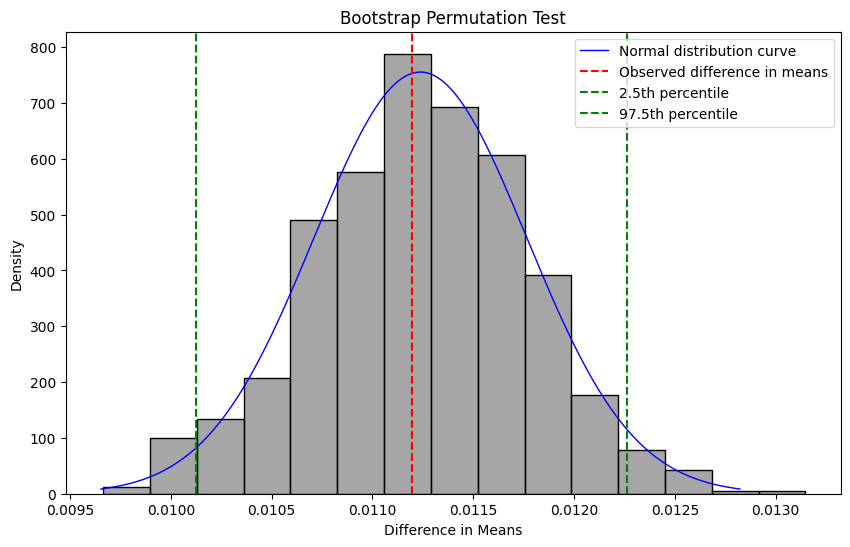

In [ ]:
confidence_interval = np.percentile(bootstrap_diff_means, [2.5, 97.5])

# Mean and standard deviation of bootstrap differences
mean_bootstrap_diff = np.mean(bootstrap_diff_means)
std_bootstrap_diff = np.std(bootstrap_diff_means)

# Generate x values for normal distribution curve
x_values = np.linspace(mean_bootstrap_diff - 3*std_bootstrap_diff, mean_bootstrap_diff + 3*std_bootstrap_diff, 1000)
y_values = norm.pdf(x_values, mean_bootstrap_diff, std_bootstrap_diff)

plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_diff_means, bins=15, kde=False, color='grey', alpha=0.7, stat='density')
plt.plot(x_values, y_values, color='blue', linewidth=1, label='Normal distribution curve')
plt.axvline(x=obs_diff_means, color='red', linestyle='--', label=f'Observed difference in means')
plt.axvline(x=confidence_interval[0], color='green', linestyle='--', label='2.5th percentile')
plt.axvline(x=confidence_interval[1], color='green', linestyle='--', label='97.5th percentile')
plt.title("Bootstrap Permutation Test")
plt.xlabel('Difference in Means')
plt.ylabel('Density')
plt.legend()
plt.grid(False)
plt.show()

# Inferential Analysis
---
Satistical inference is about drawing conclusions or making inferences about a population based on the sample. A regression analysis is generally conducted to examine the relationship between the independent and dependent varaibles. For the herd behaviour analysis, the strength and direction of the relationship between average market returns and CSAD is analysed to make conclusions.



In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import bic
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns

## Read file (csv.)

In [ ]:
hmdf=pd.read_csv('/content/sample_data/hmdf1_ftse.csv', parse_dates=['Date'], date_format='%d/%m/%y')

Drop any unnamed columns

In [ ]:
hmdf.drop(columns='Unnamed: 0',inplace=True)

## Structural Breaks & Chow Breakpoint Test

To identify the exact date (the structural break) during which COVID-19 had an impact on the market, a chow breakpoint test will be conducted.

The hypothesis is as follows,
1.   Ho: No structural breaks identified
2.   Ha: Structural breaks identified

Breakpoint Date: 2020-02-26 00:00:00
f-stats: 166.26
p-value: 0.0000


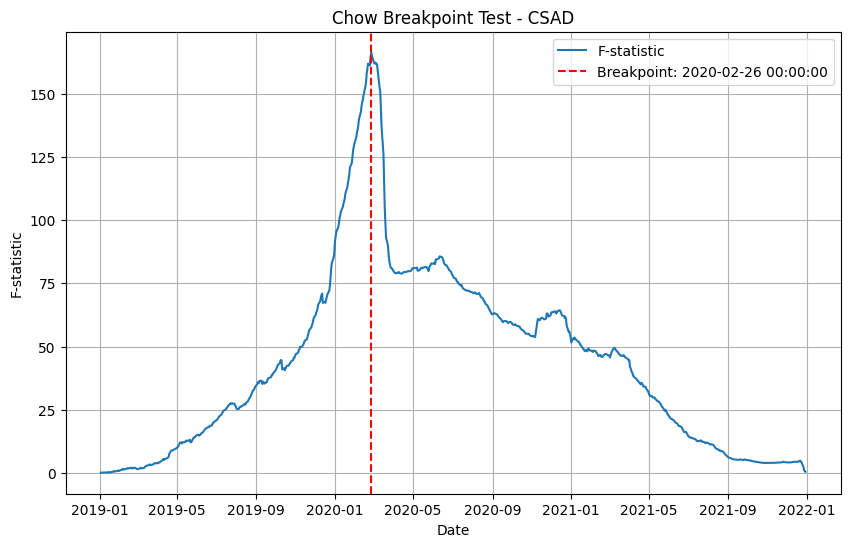

In [ ]:
hmdf = hmdf.sort_values(by='Date').reset_index(drop=True)
hmdf['CSAD'] = hmdf['CSAD'].astype(float)

# Creating a time index
hmdf['Time'] = np.arange(len(hmdf))

# Function to perform Chow test
def chow_test(hmdf, breakpoint_index):
    hmdf1 = hmdf.iloc[:breakpoint_index + 1]
    hmdf2 = hmdf.iloc[breakpoint_index + 1:]

    X1 = sm.add_constant(hmdf1['Time'])
    X2 = sm.add_constant(hmdf2['Time'])
    X = sm.add_constant(hmdf['Time'])

    y1 = hmdf1['CSAD']
    y2 = hmdf2['CSAD']
    y = hmdf['CSAD']

    model1 = sm.OLS(y1, X1).fit()
    model2 = sm.OLS(y2, X2).fit()
    model_combined = sm.OLS(y, X).fit()

    RSS1 = model1.ssr
    RSS2 = model2.ssr
    RSS_combined = model_combined.ssr

    k = X.shape[1]  # Number of parameters (including the intercept)
    n1 = len(y1)
    n2 = len(y2)
    F_stat = ((RSS_combined - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (n1 + n2 - 2 * k))

    p_value = 1 - stats.f.cdf(F_stat, k, n1 + n2 - 2 * k)
    return F_stat, p_value

# Chow test for all potential breakpoints
results = []
for i in range(1, len(hmdf) - 1):
    F_stat, p_value = chow_test(hmdf, i)
    results.append((hmdf.loc[i, 'Date'], F_stat, p_value))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'F_stat', 'p_value'])

# Identify the date with the highest F-statistic
breakpoint_date = results_df.loc[results_df['F_stat'].idxmax(), 'Date']
breakpoint_F_stat = results_df.loc[results_df['F_stat'].idxmax(), 'F_stat']
breakpoint_p_value = results_df.loc[results_df['F_stat'].idxmax(), 'p_value']
print(f"Breakpoint Date: {breakpoint_date}")
print(f"f-stats: {breakpoint_F_stat:.2f}")
print(f"p-value: {breakpoint_p_value:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['F_stat'], label='F-statistic')
plt.axvline(x=breakpoint_date, color='red', linestyle='--', label=f'Breakpoint: {breakpoint_date}')
plt.xlabel('Date')
plt.ylabel('F-statistic')
plt.title('Chow Breakpoint Test - CSAD')
plt.legend()
plt.grid(True)
plt.show()

The above plot indicates a breakpoint occured during February 26th, 2020. The p-value is statistically significant.

The breakpoint is in relation to the dispersion of stocks from the market index (CSAD). The plot clearly indicate a decrease in dispersion after the breakpoint on 26/02/2020.

Breakpoint Date: 2020-03-23 00:00:00
f-stats: 10.72
p-value: 0.0000


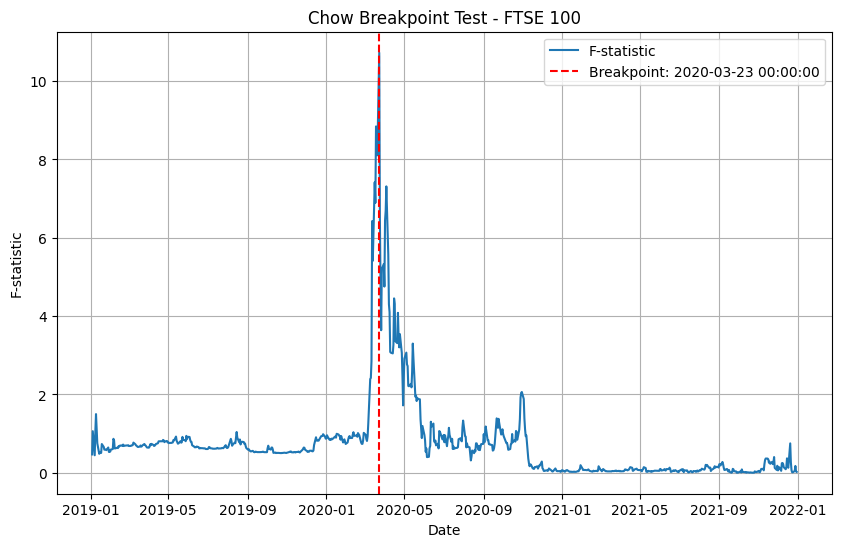

In [ ]:
hmdf = hmdf.sort_values(by='Date').reset_index(drop=True)
hmdf['FTSE_returns'] = hmdf['FTSE_returns'].astype(float)

# Creating a time index
hmdf['Time'] = np.arange(len(hmdf))

# Function to perform Chow test
def chow_test(hmdf, breakpoint_index):
    hmdf1 = hmdf.iloc[:breakpoint_index + 1]
    hmdf2 = hmdf.iloc[breakpoint_index + 1:]

    X1 = sm.add_constant(hmdf1['Time'])
    X2 = sm.add_constant(hmdf2['Time'])
    X = sm.add_constant(hmdf['Time'])

    y1 = hmdf1['FTSE_returns']
    y2 = hmdf2['FTSE_returns']
    y = hmdf['FTSE_returns']

    model1 = sm.OLS(y1, X1).fit()
    model2 = sm.OLS(y2, X2).fit()
    model_combined = sm.OLS(y, X).fit()

    RSS1 = model1.ssr
    RSS2 = model2.ssr
    RSS_combined = model_combined.ssr

    k = X.shape[1]  # Number of parameters (including the intercept)
    n1 = len(y1)
    n2 = len(y2)
    F_stat = ((RSS_combined - (RSS1 + RSS2)) / k) / ((RSS1 + RSS2) / (n1 + n2 - 2 * k))

    p_value = 1 - stats.f.cdf(F_stat, k, n1 + n2 - 2 * k)
    return F_stat, p_value

# Chow test for all potential breakpoints
results = []
for i in range(1, len(hmdf) - 1):
    F_stat, p_value = chow_test(hmdf, i)
    results.append((hmdf.loc[i, 'Date'], F_stat, p_value))

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'F_stat', 'p_value'])

# Identify the date with the highest F-statistic
breakpoint_date = results_df.loc[results_df['F_stat'].idxmax(), 'Date']
breakpoint_F_stat = results_df.loc[results_df['F_stat'].idxmax(), 'F_stat']
breakpoint_p_value = results_df.loc[results_df['F_stat'].idxmax(), 'p_value']
print(f"Breakpoint Date: {breakpoint_date}")
print(f"f-stats: {breakpoint_F_stat:.2f}")
print(f"p-value: {breakpoint_p_value:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['F_stat'], label='F-statistic')
plt.axvline(x=breakpoint_date, color='red', linestyle='--', label=f'Breakpoint: {breakpoint_date}')
plt.xlabel('Date')
plt.ylabel('F-statistic')
plt.title('Chow Breakpoint Test - FTSE 100')
plt.legend()
plt.grid(True)
plt.show()

The above plot indicates a breakpoint occured during March 23rd, 2020. The p-value is statistically significant.

The breakpoint is in relation to the market index (FTSE 100) where the returns have declined after the advent of COVID-19.

It is seen that the dates for the structural breakpoint differs in relation to CSAD, as the measure is an average of dispersion of stocks from the market index.

For the purpose of the study, the structural breakpoint will be considered on 26/02/2020 as the first case was reported during early February, 2020 in UK.

## Stationarity Test



### Augmented Dickey-Fuller Test with autolag

The ADF test was a pioneering work from Dickey-Fuller to analyse the stationarity of a sample. To generate stationarity in the data, the samples were converted to first-order by calculating the returns of stocks (with which  CSAD is derived) and the market index (FTSE 100).

The hypothesis for the test is as follows,
1.   Ho: series contains a unit root (non-stationary)
2.   Ha: series is stationary

The model can presented as follows,

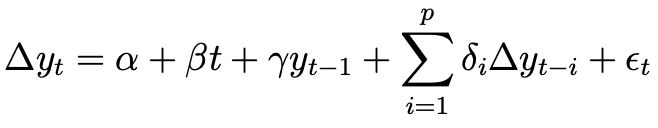

In [ ]:
columns_hmdf= ['CSAD', 'FTSE_returns']
# Function to perform ADF test and return results as a dictionary
def adf_test(series):
    result = adfuller(series, autolag='BIC')
    return {
        't-Statistic': result[0],
        'p-value': round(result[1],6),
        '#Lags Used': result[2],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    }
# List to store results
results = []
# Loop through each column and perform the ADF test
for column in columns_hmdf:
    result = adf_test(hmdf[column])
    result[''] = column
    results.append(result)

results_df = pd.DataFrame(results)
results_df = results_df[[''] + [col for col in results_df.columns if col != '']]
print(results_df)

                 t-Statistic   p-value  #Lags Used  Critical Value (1%)  \
0          CSAD    -5.002831  0.000022           4            -3.438783   
1  FTSE_returns    -9.880620  0.000000           6            -3.438805   

   Critical Value (5%)  Critical Value (10%)  
0            -2.865262             -2.568752  
1            -2.865272             -2.568757  


### Perron (1989) procedure - unit root test in the presence of structural breaks

The procedure is used to test unit roots in the presence of structural breaks. The model for the test being,

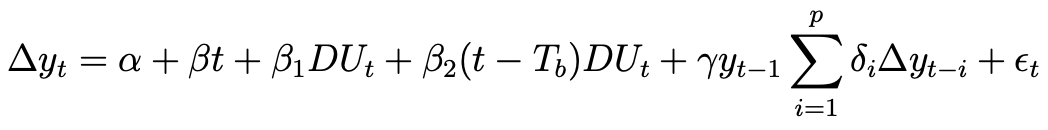



In [ ]:
# Columns to analyze
columns_hmdf = ['CSAD', 'FTSE_returns']

# Define the event date for the structural break
covid_event_date = pd.to_datetime('2020-02-26')

# Function to perform Perron (1989) test for unit root with structural break
def perron_test(data, break_date):
    # Ensure the date column is datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Sort data by date
    data = data.sort_values(by='Date').reset_index(drop=True)

    # Find the closest date to the break_date
    closest_date = data['Date'].iloc[(data['Date'] - break_date).abs().argmin()]

    # Find the index corresponding to the closest date
    break_point = data[data['Date'] == closest_date].index[0]

    # Create dummy variable for the break point
    DU = np.where(np.arange(len(data)) >= break_point, 1, 0)

    # Create the regression variables
    t = np.arange(len(data))
    DT = t * DU  # Interaction term

    # Prepare X matrix with constant, time trend, dummy, and interaction term
    X = sm.add_constant(np.column_stack([t, DU, DT]))

    # Fit the regression
    model = sm.OLS(data['Value'].values, X).fit()

    # Perform ADF test on the residuals of the fitted model
    adf_result = adfuller(model.resid, autolag='BIC')

    return {
        't-Statistic': adf_result[0],
        'p-value': round(adf_result[1], 6),
        '#Lags Used': adf_result[2],
        'Critical Value (1%)': adf_result[4]['1%'],
        'Critical Value (5%)': adf_result[4]['5%'],
        'Critical Value (10%)': adf_result[4]['10%'],
    }

# List to store results
results = []

# Loop through each column and perform the Perron (1989) test
for column in columns_hmdf:
    # Prepare the data for the current column
    data = hmdf[['Date', column]].dropna()
    data = data.rename(columns={column: 'Value'})

    # Perform the Perron test
    result = perron_test(data, covid_event_date)
    result['Series'] = column
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df[['Series'] + [col for col in results_df.columns if col != 'Series']]

# Print the results
print(results_df)

         Series  t-Statistic  p-value  #Lags Used  Critical Value (1%)  \
0          CSAD    -6.891254      0.0           4            -3.438783   
1  FTSE_returns    -9.925749      0.0           6            -3.438805   

   Critical Value (5%)  Critical Value (10%)  
0            -2.865262             -2.568752  
1            -2.865272             -2.568757  


The p-value is statistically significant, thus proving stationarity in the sample. An autolag was considered with Bayseian Information Criterion (BIC) or Schwarz Criterion (SC)

### VAR Lag Order Structure

It is important to determine a lag structure to identify the appropriate lagged value to execute the model. The identification of the lagged value can be conducted using Vector Autoregrssion.

A BIC lag order is utilised for this study which is observed at 2.

In [ ]:
hmdf_numeric = hmdf.select_dtypes(include=[np.number])
# Function to determine the optimal lag order
def determine_optimal_lag(hmdf, maxlags=30):
    model = VAR(hmdf)
    lag_order_results = model.select_order(maxlags=maxlags, trend='n')
    return lag_order_results
# Maximum number of lags
maxlags = 30

# Optimal lag order
lag_order_results = determine_optimal_lag(hmdf_numeric, maxlags=maxlags)
print("Lag Order Selection Criteria Results:")
print(lag_order_results.summary())

optimal_lag_bic = lag_order_results.bic
print(f"Optimal lag order based on BIC: {optimal_lag_bic}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order Selection Criteria Results:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -309.5      -309.2  3.776e-135      -309.4
1       -384.4      -383.8  1.186e-167      -384.1
2      -382.1*     -381.2* 1.141e-166*     -381.7*
3       -381.6      -380.4  1.848e-166      -381.1
4       -382.8      -381.2  5.919e-167      -382.2
5       -377.8      -376.0  8.223e-165      -377.1
6       -362.7      -360.6  2.934e-158      -361.9
7       -363.1      -360.6  2.093e-158      -362.1
8       -364.1      -361.4  7.344e-159      -363.1
9       -361.0      -358.0  1.618e-157      -359.9
10      -358.0      -354.7  3.192e-156      -356.8
11      -355.0      -351.3  6.795e-155      -353.6
12      -356.3      -352.4  1.812e-155      -354.8
13      -356.9      -352.6  1.016e-155      -355.3
14      -357.0      -352.5  8.757e-156      -355.3
15      -356.3      -351.4  1.821e-155      

### Stationarity test with 2 lags

The model is re-executed with 2 lags to identify the stationarity of the sample. Perron's model is applied with 2 lags to identify stationarity.

In [ ]:
# Define the columns you want to test
columns_hmdf = ['CSAD', 'FTSE_returns']  # Replace with your actual column names

# Define the event date for the structural break
covid_event_date = pd.to_datetime('2020-02-26')

# Function to perform Perron (1989) test for unit root with structural break
def perron_test(series, break_date, maxlag=2):
    # Ensure the Date column is datetime and aligned with the data
    data = series.dropna().reset_index(drop=True)

    # Generate time variable
    t = np.arange(len(data))

    # Identify the closest date to the break_date
    # Convert series.index to datetime if it's not already
    if not isinstance(series.index, pd.DatetimeIndex):
        series.index = pd.to_datetime(series.index)
    break_point = (series.index >= break_date).argmax()

    # Create dummy variable for the break point
    DU = np.where(t >= break_point, 1, 0)

    # Create the interaction term for the break point
    DT = t * DU

    # Construct the regression matrix with a constant, time trend, and break indicators
    X = sm.add_constant(np.column_stack([t, DU, DT]))

    # Fit the regression model
    model = sm.OLS(data.values, X).fit()

    # Perform ADF test on the residuals of the fitted model
    adf_result = adfuller(model.resid, maxlag=maxlag, autolag='BIC')

    return {
        't-Statistic': adf_result[0],
        'p-value': round(adf_result[1], 6),
        '#Lags Used': adf_result[2],
        'Critical Value (1%)': adf_result[4]['1%'],
        'Critical Value (5%)': adf_result[4]['5%'],
        'Critical Value (10%)': adf_result[4]['10%'],
        'Break Date': break_date
    }

# List to store results
results = []

# Loop through each column and perform the Perron (1989) test with a lag order of 2
for column in columns_hmdf:
    series = hmdf[column].dropna()
    result = perron_test(series, covid_event_date, maxlag=2)
    result['Series'] = column
    results.append(result)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df[['Series'] + [col for col in results_df.columns if col != 'Series']]

# Print the results
print(results_df)

         Series  t-Statistic  p-value  #Lags Used  Critical Value (1%)  \
0          CSAD    -7.076455      0.0           2            -3.438761   
1  FTSE_returns   -27.658818      0.0           0            -3.438740   

   Critical Value (5%)  Critical Value (10%) Break Date  
0            -2.865253             -2.568747 2020-02-26  
1            -2.865243             -2.568742 2020-02-26  


## Quadratic Regression using OLS estimation

A quadratic regression is implemented to identfy the curvilinear relationship between the independent and dependent variables.

It is been identified in previous studies that behaviour results in an increase in dispersion at a decreasing rate and during extreme events of herding, it may lead to decrease in dispersion. To prove this relationship, a quadratic function is utilised.

The following model conducts a quadratic (degree=2) regression and plots the original values with a fitted quadratic curve.

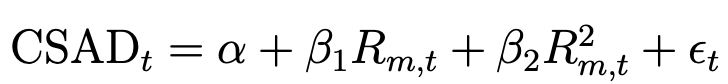

A negative and statistically significant β2 indicate the persence of herding.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     131.3
Date:                Wed, 14 Aug 2024   Prob (F-statistic):           7.17e-50
Time:                        12:45:49   Log-Likelihood:                 2983.4
No. Observations:                 783   AIC:                            -5961.
Df Residuals:                     780   BIC:                            -5947.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.000     53.717      0.0

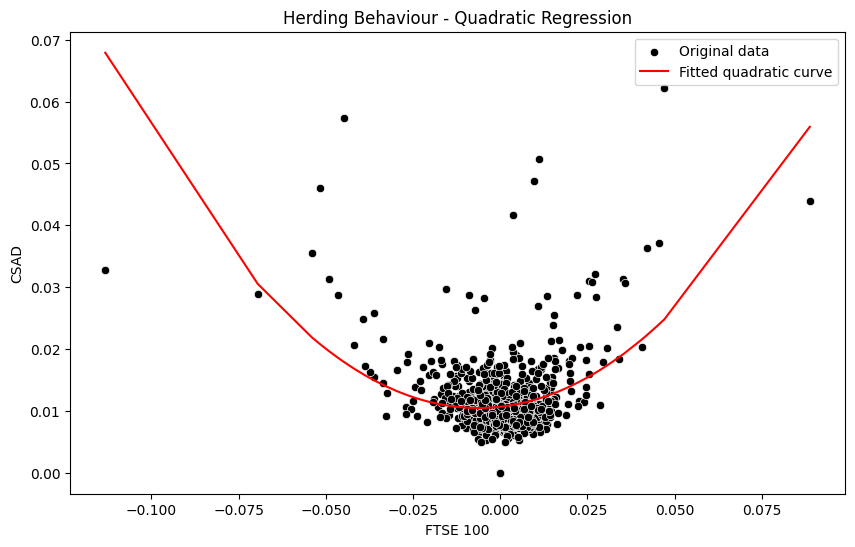

In [ ]:
x = hmdf['FTSE_returns'].values.reshape(-1, 1)
y = hmdf['CSAD'].values.reshape(-1, 1)

# Transforming the data to include quadratic features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Fitting a linear regression model on the transformed data
model = LinearRegression()
model.fit(x_poly, y)

# Using statsmodels to generate detailed regression results
x_poly_sm = sm.add_constant(x_poly)  # Add constant term for intercept
model_sm = sm.OLS(y, x_poly_sm)
results = model_sm.fit()

# OLS summary
print(results.summary())

# Plot the original data and the fitted curve
y_pred = model.predict(x_poly)
plt.figure(figsize=(10,6))
sns.scatterplot(x=hmdf['FTSE_returns'], y=hmdf['CSAD'], color='black', label='Original data')
sns.lineplot(x=hmdf['FTSE_returns'], y=y_pred.flatten(), color='red', label='Fitted quadratic curve')
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.title('Herding Behaviour - Quadratic Regression')
plt.legend()
plt.show()

It is observed that the relationship is infact curvilinear (U-shaped). The quadratic parameter β2 is positive and statistically significant. The results show no presence of herding.

However, the relationship can only be justified in absolute values of the independent variable as the dependent variable is in absolute value terms. CSAD is considered as a measurement to identify the magnitude of the deviation/dispersion in a symmetric state or situation. The direction of the deviation is not important.

### Herd Menatility detection in absolute value terms

Therefore, the above model is modified to include absolute value of the market index (FTSE 100) and re-estimated as follows,

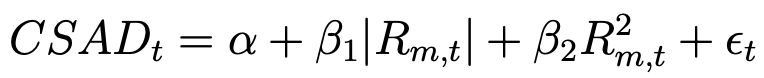

The model consists of autocorrelation, and in order to eliminate the serial correlation among residuals a **Cochrane-Orcutt procedure** is implemented.

The procedure is used to correct for first-order autocorrelation (AR(1)) in the residuals (errors). First-order autocorrelation occurs when the residuals from one period are correlated with residuals from the previous period, violating the assumption of independent errors in ordinary least squares (OLS) regression. This procedure iteratively estimates the model, adjusting for the autocorrelation, and aims to improve the efficiency of the estimators.

If the error term is serially correlated, then the standard statistical inference normally applied to regressions is invalid becasue standard errors/residuals will be estimated with bias.

In [ ]:
x = np.abs(hmdf['FTSE_returns']).values.reshape(-1, 1)
y = hmdf['CSAD'].values.reshape(-1, 1)

# Transforming the data to include quadratic features
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)

# Adding a constant for the intercept term
x_poly_sm = sm.add_constant(x_poly)

# Fitting the initial OLS model
model_sm = OLS(y, x_poly_sm)
results = model_sm.fit()

# OLS summary
print("OLS Regression Summary:")
print(results.summary())

# Cochrane-Orcutt procedure
def cochrane_orcutt(model_results, max_iter=100, tol=1e-6):
    rho_prev = 0
    for iteration in range(max_iter):
        residuals = model_results.resid
        rho = np.corrcoef(residuals[1:], residuals[:-1])[0, 1]  # Estimate autocorrelation parameter

        # Transforming the data to correct for autocorrelation
        X = model_results.model.exog
        y = model_results.model.endog

        # Transformation for dependent variable
        y_trans = y[1:] - rho * y[:-1]

        # Transformation for independent variables
        X_trans = X[1:] - rho * X[:-1]

        # Refitting the model on the transformed data
        X_trans = sm.add_constant(X_trans)  # Add constant term for intercept
        model_trans = OLS(y_trans, X_trans)
        model_results = model_trans.fit()

        # Calculate Durbin-Watson statistic
        dw_stat = durbin_watson(model_results.resid)
        print(f"Iteration {iteration + 1}: rho = {rho:.6f}, Durbin-Watson = {dw_stat:.6f}")

        # Check for convergence
        if np.abs(rho - rho_prev) < tol or (dw_stat > 1.95 and dw_stat < 2.05):
            print(f"Convergence achieved after {iteration + 1} iterations.")
            break

        rho_prev = rho

    return model_results, rho

# Applying Cochrane-Orcutt method
results_trans, rho = cochrane_orcutt(results)

# Cochrane-Orcutt adjusted OLS summary
print("\nCochrane-Orcutt Adjusted OLS Regression Summary:")
print(results_trans.summary())
print(f"Estimated rho (autocorrelation parameter): {rho:.6f}")

# Predict y values using the Cochrane-Orcutt adjusted model
y_pred = results_trans.predict(sm.add_constant(x_poly))

OLS Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           1.16e-80
Time:                        18:02:41   Log-Likelihood:                 3054.6
No. Observations:                 783   AIC:                            -6103.
Df Residuals:                     780   BIC:                            -6089.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0

The parameter (β2) is negative and statistically significant in the Cochrane-Orcutt adjusted OLS. This proves an existence in herding in the market during the sample period.

Multicollinearity generally exists in a quadratic regression considering a squared (degree=2) term of the independent variable is used to obtain results.

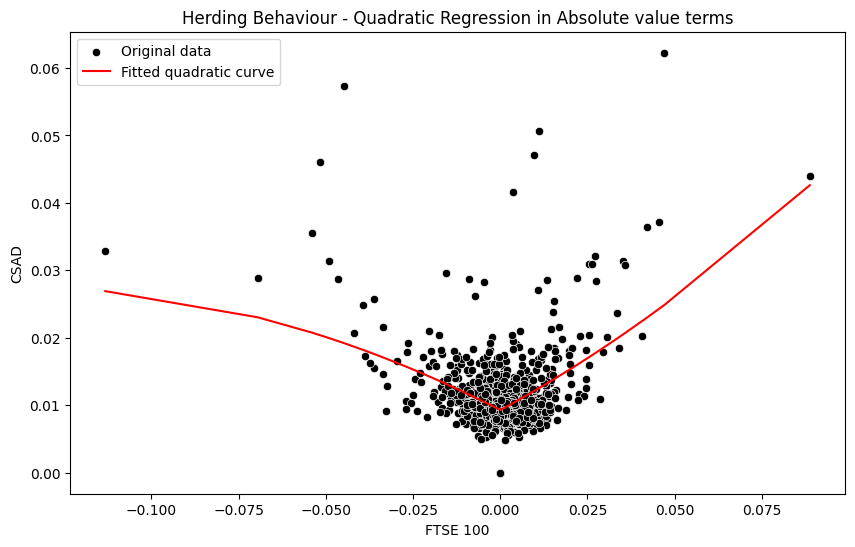

In [ ]:
# Plot the original data and the fitted curve using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hmdf['FTSE_returns'], y=hmdf['CSAD'], color='black', label='Original data')
sns.lineplot(x=hmdf['FTSE_returns'], y=y_pred, color='red', label='Fitted quadratic curve')
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.title('Herding Behaviour - Quadratic Regression in Absolute value terms')
plt.legend()
plt.show()

When absolute value is induced to the quadratic function, the fitted curve takes a V-shape as the *'x'* values do not fall below zero.

Now, it is important to consider the behaviour in asymmetric market conditions to capture where herding behaviour is significantly observed.

**Plotting residuals with and without autocorrelation**

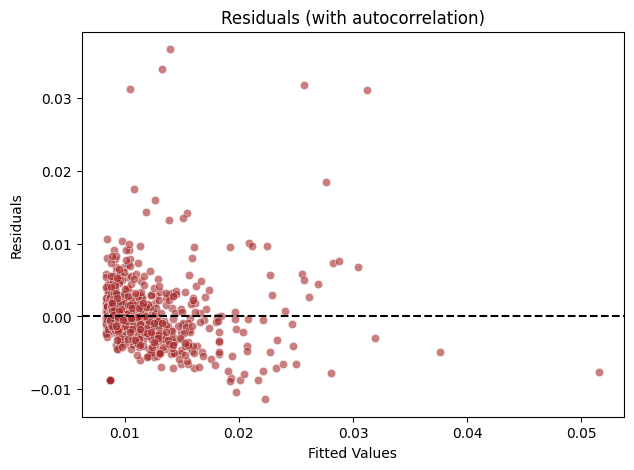

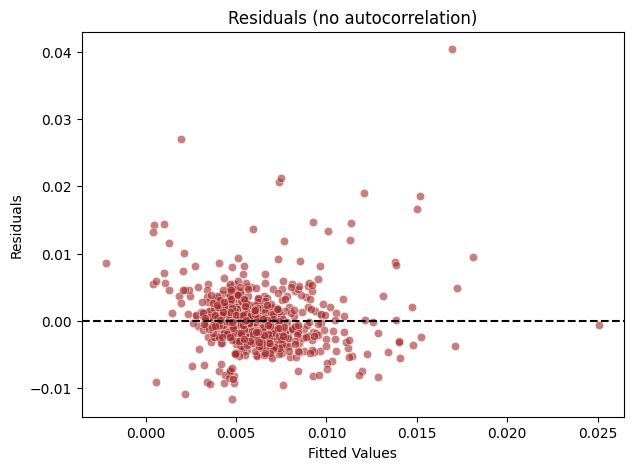

In [ ]:
# Residual plot before Cochrane-Orcutt adjustment
plt.figure(figsize=(7, 5))
sns.scatterplot(x=results.fittedvalues, y=results.resid, color='brown', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (with autocorrelation)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Residual plot after Cochrane-Orcutt adjustment
plt.figure(figsize=(7, 5))
sns.scatterplot(x=results_trans.fittedvalues, y=results_trans.resid, color='brown', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (no autocorrelation)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Herd Mentality detection in asymmetric market conditions

The above model will be reassessed to include the asymmetric factors by introducing a variable (Yup). The equation is re-estimated as follows,

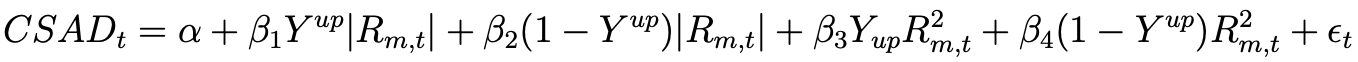

The variable is induced to capture the up (Yup) and down (1-Yup) market movements.

In [ ]:
x = hmdf['FTSE_returns']
y = hmdf['CSAD']

# Creating the asymmetric (for up movement) variable
Yup = (x > 0).astype(int)

# Create the independent variables based on the formula
X = pd.DataFrame({
    '\u03B21': Yup * np.abs(x),
    '\u03B22': (1 - Yup) * np.abs(x),
    '\u03B23': Yup * x**2,
    '\u03B24': (1 - Yup) * x**2
})

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fitting the initial OLS model
model_sm = OLS(y, X)
results = model_sm.fit()

# OLS summary
print("OLS Results:")
print(results.summary())

# Cochrane-Orcutt iterative procedure
def cochrane_orcutt_iterate(results, tol=1e-5, max_iter=100):
    iter_count = 0
    while iter_count < max_iter:
        iter_count += 1
        residuals = results.resid
        rho = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]

        y_transformed, X_transformed = cochrane_orcutt(results.model.endog, results.model.exog, rho)
        model_sm_transf = OLS(y_transformed, X_transformed)
        results_transf = model_sm_transf.fit()

        # Calculate Durbin-Watson statistic
        dw_stat = sm.stats.durbin_watson(results_transf.resid)

        print(f"Iteration {iter_count}: rho = {rho:.6f}, Durbin-Watson = {dw_stat:.6f}")

        if 1.95 < dw_stat < 2.05:
            print(f"Convergence achieved after {iter_count} iterations.")
            break

        results = results_transf

    return results_transf, rho, iter_count

def cochrane_orcutt(y, X, rho):
    """Apply the Cochrane-Orcutt transformation."""
    y_transformed = y[1:] - rho * y[:-1]
    X_transformed = X[1:] - rho * X[:-1, :]
    return y_transformed, X_transformed

# Apply the Cochrane-Orcutt method iteratively
results_transf, rho, iterations = cochrane_orcutt_iterate(results)

# Cochrane-Orcutt corrected summary
print("\nCochrane-Orcutt Adjusted OLS Regression Summary:")
print(results_transf.summary())
print(f"Estimated rho (autocorrelation parameter): {rho:.6f}")
print(f"Number of iterations: {iterations}")

# Predict y values using the fitted Cochrane-Orcutt model
y_pred = results_transf.predict(sm.add_constant(X))

OLS Results:
                            OLS Regression Results                            
Dep. Variable:                   CSAD   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     124.6
Date:                Tue, 20 Aug 2024   Prob (F-statistic):           3.35e-82
Time:                        18:10:35   Log-Likelihood:                 3063.7
No. Observations:                 783   AIC:                            -6117.
Df Residuals:                     778   BIC:                            -6094.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0082      0.000     30

β3 is poitive and not statistically insignificant, thus rejecting the parameter. However, β4 shows a negative and statistically significant result proving the occurence of herding in down market movements.

The results do collide with previous studies that confirms that herding behaviour is observed during down market movements when investors are unsure about the sentiment in the market.

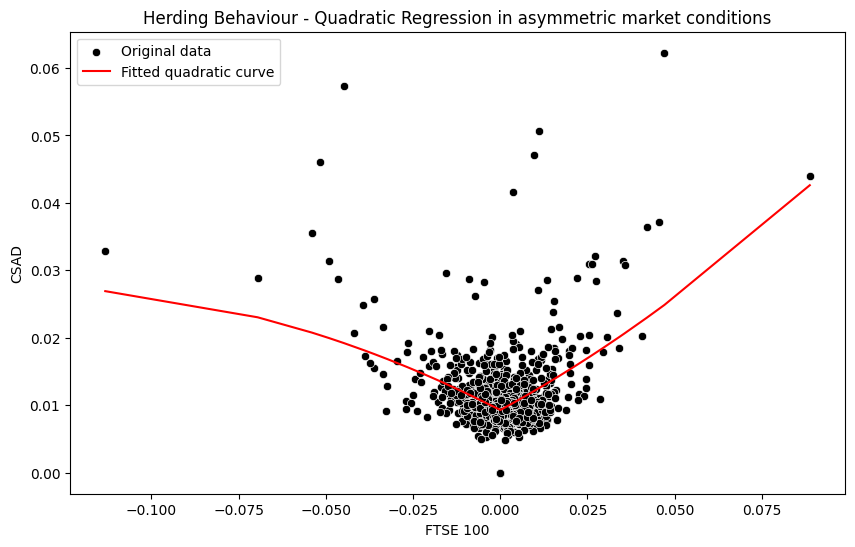

In [ ]:
# Plot the original data and the fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='black', label='Original data')
sns.lineplot(x=x, y=y_pred, color='red', label='Fitted quadratic curve')
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.title('Herding Behaviour - Quadratic Regression in asymmetric market conditions')
plt.legend()
plt.show()

**Plotting residuals with and without autocorrelation**

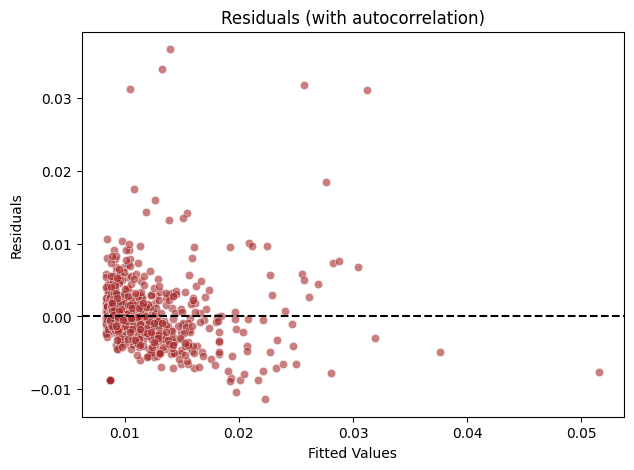

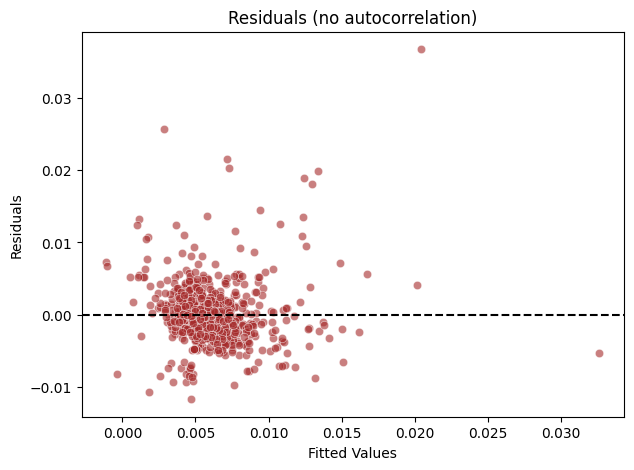

In [ ]:
# Residual plot before Cochrane-Orcutt adjustment
plt.figure(figsize=(7, 5))
sns.scatterplot(x=results.fittedvalues, y=results.resid, color='brown', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (with autocorrelation)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Residual plot after Cochrane-Orcutt adjustment
plt.figure(figsize=(7, 5))
sns.scatterplot(x=results_transf.fittedvalues, y=results_transf.resid, color='brown', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (no autocorrelation)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

### Herding Mentality detection in asymmetric conditions during the black swan event (COVID-19)

Now, it is important to realise the impact of the event in the market and interpret if the event created a significant change in the market movements.

For this, a dummy varibale (Ocovid) will be introduced and the above model will be re-estimated.

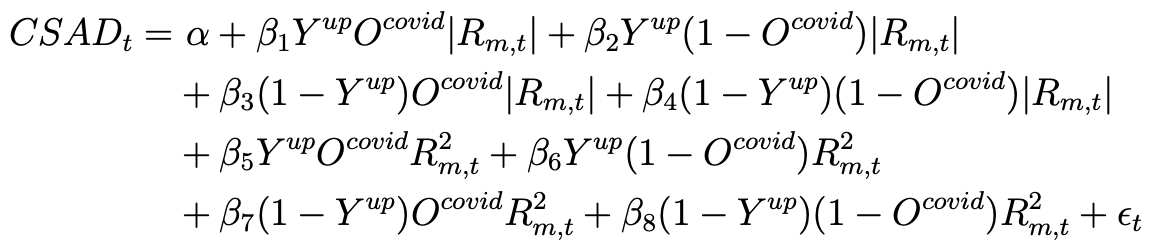

The variable is induced to capture up (Yup) and down (1-Yup) market movements during (Ocovid) and previous (1-Ocovid) COVID-19 event.

In [ ]:
# Event date for COVID-19
covid_event_date = '26/02/20'
hmdf['Date'] = pd.to_datetime(hmdf['Date'])

# Define the dependent variable and independent variables
x = hmdf['FTSE_returns']
y = hmdf['CSAD']

# Creating the asymmetric (for up movement) variable
Yup = (x > 0).astype(int)

# Dummy COVID-19 variable
Ocovid = (hmdf['Date'] >= covid_event_date).astype(int)

# Create the independent variables based on the given formula
X = pd.DataFrame({
    '\u03B21': Yup * Ocovid * np.abs(x),
    '\u03B22': Yup * (1 - Ocovid) * np.abs(x),
    '\u03B23': (1 - Yup) * Ocovid * np.abs(x),
    '\u03B24': (1 - Yup) * (1 - Ocovid) * np.abs(x),
    '\u03B25': Yup * Ocovid * x**2,
    '\u03B26': Yup * (1 - Ocovid) * x**2,
    '\u03B27': (1 - Yup) * Ocovid * x**2,
    '\u03B28': (1 - Yup) * (1 - Ocovid) * x**2
})

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the initial OLS model
model_sm = OLS(y, X)
results = model_sm.fit()

# Print initial OLS summary
print("OLS Results:")
print(results.summary())

# Cochrane-Orcutt iterative procedure
def cochrane_orcutt_iterate(y, X, tol=1e-5, max_iter=100):
    iter_count = 0
    rho = 0
    results = model_sm.fit()

    while iter_count < max_iter:
        iter_count += 1
        residuals = results.resid
        rho = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]

        y_transformed, X_transformed = cochrane_orcutt(y, X, rho)
        model_sm_transfo = OLS(y_transformed, X_transformed)
        results = model_sm_transfo.fit()

        # Calculate Durbin-Watson statistic
        dw_stat = durbin_watson(results.resid)

        print(f"Iteration {iter_count}: rho = {rho:.6f}, Durbin-Watson = {dw_stat:.6f}")

        if 1.92 < dw_stat < 2.05:
            print(f"Convergence achieved after {iter_count} iterations.")
            break

    return results, rho, iter_count

def cochrane_orcutt(y, X, rho):
    """Apply the Cochrane-Orcutt transformation."""
    y_transformed = y[1:] - rho * y[:-1]
    X_transformed = X[1:] - rho * X[:-1, :]
    return y_transformed, X_transformed

# Apply the Cochrane-Orcutt method iteratively
results_transfo, rho, iterations = cochrane_orcutt_iterate(y.values, X.values)

# Print summary of Cochrane-Orcutt corrected results
print("\nCochrane-Orcutt Adjusted OLS Regression Summary:")
print(results_transfo.summary())
print(f"Estimated rho (autocorrelation parameter): {rho:.6f}")
print(f"Number of iterations: {iterations}")

# Predict y values using the fitted Cochrane-Orcutt model
# Note: Need to re-transform predictions to match the original data length
# Append the first residual to align length
y_pred_transfo = results_transfo.predict(sm.add_constant(X.values[1:]))
y_pred = np.concatenate(([y.iloc[0]], y_pred_transfo))  # Adding the first observation for alignment

OLS Results:
                            OLS Regression Results                            
Dep. Variable:                   CSAD   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     77.52
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.08e-93
Time:                        14:31:37   Log-Likelihood:                 3100.2
No. Observations:                 783   AIC:                            -6182.
Df Residuals:                     774   BIC:                            -6140.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0087      0.000     31

The results indicate that β6 is positive and statistically significant showing that investors behaved rationally as the market was up and before the COVID-19 impact. β7 provided a negative and a statistically significant result indicating that investors were herding in the down market during the COVID-19 event.

It proves that investors do behave irrationally when an uncertain event occur and fall back by herding.

β5 and β8 were proved statistically insignificant and thus the results cannot be considered conclusive.

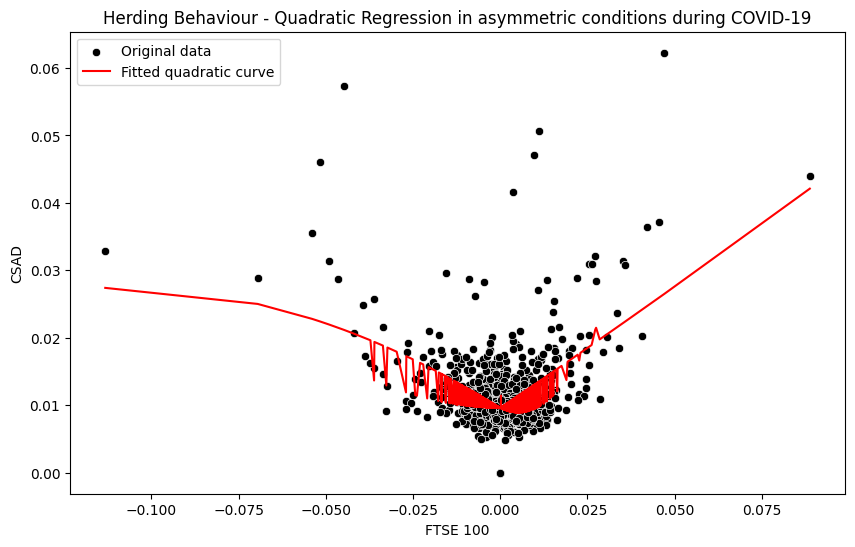

In [ ]:
# Plot the original data and the fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y, color='black', label='Original data')
sns.lineplot(x=x, y=y_pred, color='red', label='Fitted quadratic curve')
plt.xlabel('FTSE 100')
plt.ylabel('CSAD')
plt.title('Herding Behaviour - Quadratic Regression in asymmetric conditions during COVID-19')
plt.legend()
plt.show()

The introduciton of the dummy variable creates variations in the fitted quadratic curve. However, the curve folllows a V-shape (absolute terms) that accurately proves the relationship.

#### Identifying Predicted R-Sqaured

Predicted R-Squared value helps to determine if the model is overfitting the data. An overfit model includes excessive number of estimators which is obsrved in our model and can begin to fit random noise to the model.

In [ ]:
# Event date for COVID-19
covid_event_date = '26/02/20'
hmdf['Date'] = pd.to_datetime(hmdf['Date'])

# Define the dependent variable and independent variables
x = hmdf['FTSE_returns']
y = hmdf['CSAD']

# Creating the asymmetric (for up movement) variable
Yup = (x > 0).astype(int)

# Dummy COVID-19 variable
Ocovid = (hmdf['Date'] >= covid_event_date).astype(int)

# Create the independent variables based on the given formula
X = pd.DataFrame({
    '\u03B21': Yup * Ocovid * np.abs(x),
    '\u03B22': Yup * (1 - Ocovid) * np.abs(x),
    '\u03B23': (1 - Yup) * Ocovid * np.abs(x),
    '\u03B24': (1 - Yup) * (1 - Ocovid) * np.abs(x),
    '\u03B25': Yup * Ocovid * x**2,
    '\u03B26': Yup * (1 - Ocovid) * x**2,
    '\u03B27': (1 - Yup) * Ocovid * x**2,
    '\u03B28': (1 - Yup) * (1 - Ocovid) * x**2
})

# Add a constant for the intercept term
X = sm.add_constant(X)

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS model on the training data
model_sm_train = OLS(y_train, X_train)
results_train = model_sm_train.fit()

# Predict on the testing set
y_pred_test = results_train.predict(X_test)

# Calculate predicted R-squared
y_mean_train = y_train.mean()
pred_r_squared = 1 - np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - y_mean_train) ** 2)

print(f"Predicted R-squared: {pred_r_squared:.4f}")

Predicted R-squared: 0.2578


The predicted R-Squared is low by 5% in comparison to the adjusted (real) R-Squared. Eventhough the value is lower to the original value, it cannot be disregarded as a unfit model for the exisiting sample. The model can be utilised to generate meaningful insights for other sample studies and can be used to generate predictions.

**Plotting residuals with and without autocorrelation**

Text(0, 0.5, 'Residuals')

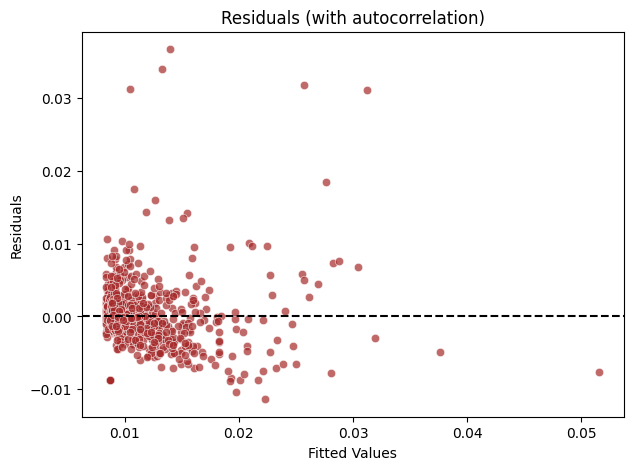

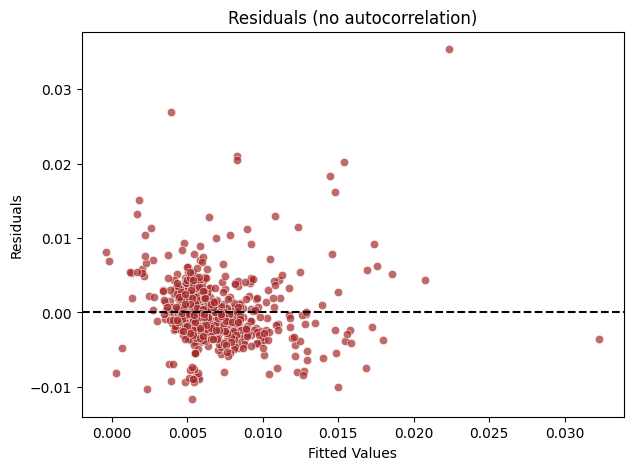

In [ ]:
# Residuals vs Fitted Values
plt.figure(figsize=(7, 5))
sns.scatterplot(x=results.fittedvalues, y=results.resid, alpha=0.7, color='brown')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals (with autocorrelation)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# Plot residuals vs fitted values after Cochrane-Orcutt
plt.figure(figsize=(7, 5))
sns.scatterplot(x=results_transfo.fittedvalues, y=results_transfo.resid, alpha=0.7, color='brown')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals (no autocorrelation)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

## Quantile Regression

Quantile regression is a comprehensive way to analyse the relationships between a set of variables, and are far more robust to outliers and non-normality than OLS.

It is an efficient approach in determining herding behaviour since the model can account for herding at any moment of the market return distribution. The regression model is as
follows:

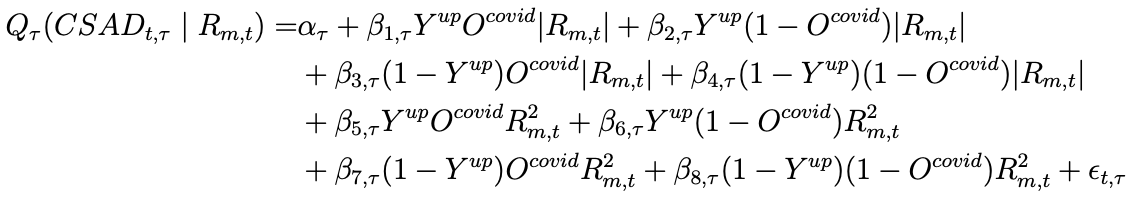

In [ ]:
event_date = '26/02/20'
hmdf['Date'] = pd.to_datetime(hmdf['Date'])

# Dependent variable and independent variables
x = hmdf['FTSE_returns']
y = hmdf['CSAD']

# Creating the asymmetric (for up movement) variable
Yup = (x > 0).astype(int)

# Ocovid variable
Ocovid = (hmdf['Date'] >= event_date).astype(int)

# Independent variables based on the given formula
X = pd.DataFrame({
    '\u03B21': Yup * Ocovid * np.abs(x),
    '\u03B22': Yup * (1 - Ocovid) * np.abs(x),
    '\u03B23': (1 - Yup) * Ocovid * np.abs(x),
    '\u03B24': (1 - Yup) * (1 - Ocovid) * np.abs(x),
    '\u03B25': Yup * Ocovid * x**2,
    '\u03B26': Yup * (1 - Ocovid) * x**2,
    '\u03B27': (1 - Yup) * Ocovid * x**2,
    '\u03B28': (1 - Yup) * (1 - Ocovid) * x**2
})

# Constant for the intercept term
X = sm.add_constant(X)

# Quantiles to be examined
quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]

# Fit quantile regression models and store the results
models = {}
results = {}

summary_df = pd.DataFrame(columns=['Quantile', 'Variable', 'Coefficient', 'P-value'])

for q in quantiles:
    mod = QuantReg(y, X)
    res = mod.fit(q=q)
    models[q] = mod
    results[q] = res

    summary_temp = pd.DataFrame({
        'Quantile': q,
        'Variable': res.params.index,
        'Coefficient': res.params.values,
        't-stats' : res.tvalues.values,
        'P-value': res.pvalues.values
    })

    summary_df = pd.concat([summary_df, summary_temp], ignore_index=True)

summary_df['P-value'] = summary_df['P-value'].map(lambda x: '{:.6f}'.format(x))
summary_df['Coefficient'] = summary_df['Coefficient'].map(lambda x: '{:.6f}'.format(x))

# Print summary of results for each quantile
print(summary_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
<ipython-input-17-f6e890dcbd33>:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_df = pd.concat([summary_df, summary_temp], ignore_index=True)


    Quantile Variable Coefficient   P-value    t-stats
0       0.10    const    0.005729  0.000000  21.284678
1       0.10       β1    0.219198  0.000158   3.797161
2       0.10       β2    0.174371  0.070812   1.809171
3       0.10       β3    0.272400  0.000000   5.113087
4       0.10       β4    0.290001  0.000713   3.398315
5       0.10       β5    2.390406  0.187659   1.318700
6       0.10       β6   -2.627185  0.488014  -0.693803
7       0.10       β7   -0.293172  0.800515  -0.252767
8       0.10       β8   -6.032673  0.048830  -1.973184
9       0.25    const    0.007613  0.000000  45.807793
10      0.25       β1    0.233633  0.000000   7.833956
11      0.25       β2   -0.073871  0.235292  -1.187761
12      0.25       β3    0.282553  0.000000  10.244093
13      0.25       β4    0.122074  0.044181   2.015653
14      0.25       β5    1.988444  0.010293   2.572136
15      0.25       β6    8.699573  0.002935   2.983915
16      0.25       β7   -0.529827  0.289151  -1.060714
17      0.

It is observed that herding is much prevalent in down market movements during COVID-19 in quantiles 0.50 & 0.75, thus authenticating the reliance on the quadratic regression function.

Herding is observed during down market movements in quantile 0.10 and 0.25, but the results are not statistically significant.

The results also indicate that herding does not exist in the up market movement before COVID-19 which are statistically significant.

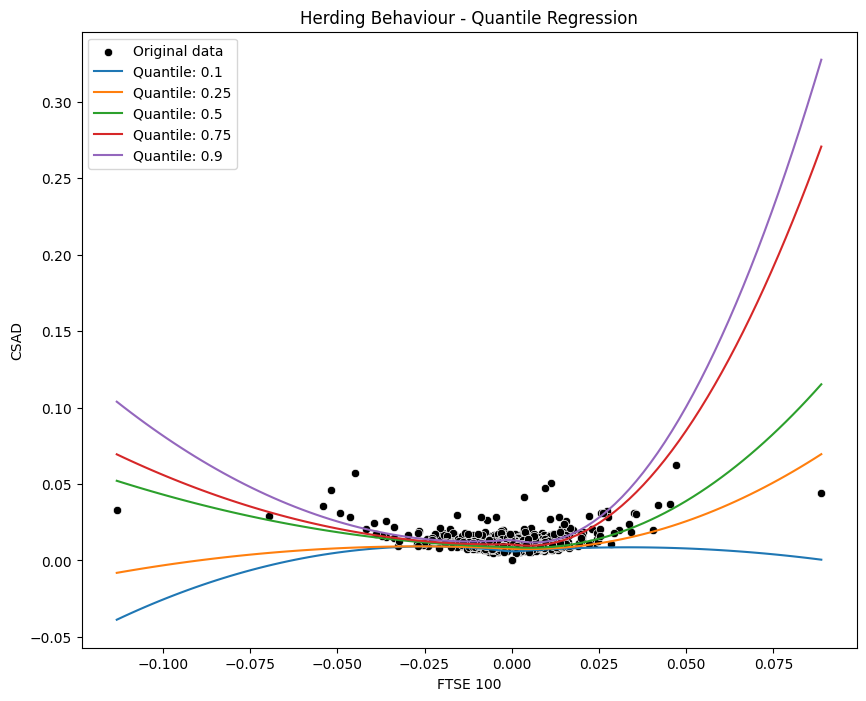

In [ ]:
# Plot the results
def plot_quantile_regression_results(x, y, results, quantiles, Yup, Ocovid):
    plt.figure(figsize=(10, 8))

    # Scatter plot of the original data
    sns.scatterplot(x=x, y=y, color='black', label='Original data')

    # Generate a range of x values for plotting
    x_plot = np.linspace(x.min(), x.max(), 100)

    # Use mean values for categorical variables in predictions
    Yup_mean = (x_plot > 0).astype(int)
    Ocovid_mean = (x_plot >= np.median(hmdf['Date'].astype('int64'))).astype(int)

    for q in quantiles:
        x_plot_poly = pd.DataFrame({
            '\u03B21': Yup_mean * Ocovid_mean * np.abs(x_plot),
            '\u03B22': Yup_mean * (1 - Ocovid_mean) * np.abs(x_plot),
            '\u03B23': (1 - Yup_mean) * Ocovid_mean * np.abs(x_plot),
            '\u03B24': (1 - Yup_mean) * (1 - Ocovid_mean) * np.abs(x_plot),
            '\u03B25': Yup_mean * Ocovid_mean * x_plot**2,
            '\u03B26': Yup_mean * (1 - Ocovid_mean) * x_plot**2,
            '\u03B27': (1 - Yup_mean) * Ocovid_mean * x_plot**2,
            '\u03B28': (1 - Yup_mean) * (1 - Ocovid_mean) * x_plot**2
        })

        x_plot_poly = sm.add_constant(x_plot_poly)
        y_pred = results[q].predict(x_plot_poly)
        sns.lineplot(x=x_plot, y=y_pred, label=f'Quantile: {q}')

    plt.xlabel('FTSE 100')
    plt.ylabel('CSAD')
    plt.title('Herding Behaviour - Quantile Regression')
    plt.legend()
    plt.show()

# Call the plotting function
plot_quantile_regression_results(x, y, results, quantiles, Yup, Ocovid)

### Quantile Regression line plots for differentiation

The following function plots regression lines for each quantile for the asymmetric market movements and COVID-19 event.

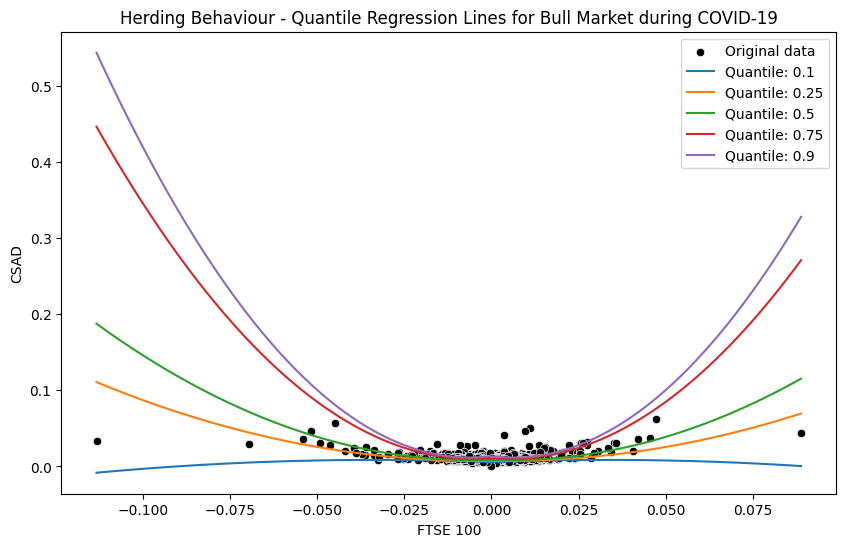

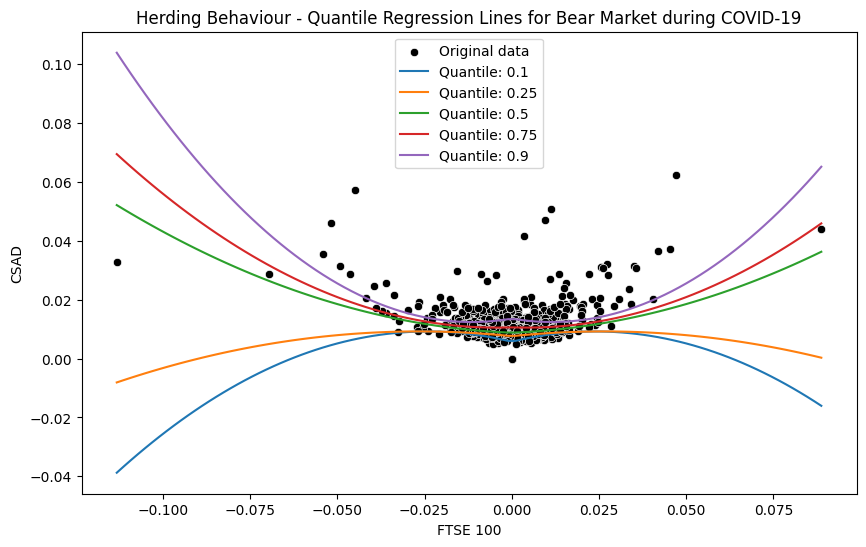

In [ ]:
# Define the plotting function for up and down markets during COVID-19
def plot_quantile_regression_up_down(x, y, results, quantiles, Yup, Ocovid):
    x_plot = np.linspace(x.min(), x.max(), 100)
    Ocovid_mean = (x_plot >= np.median(hmdf['Date'].astype('int64'))).astype(int)

    # Separate plots for up and down market movements
    for market_condition, label in [(1, 'Bull Market'), (0, 'Bear Market')]:
        plt.figure(figsize=(10, 6))

        # Scatter plot of the original data
        sns.scatterplot(x=x, y=y, color='black', label='Original data')

        for q in quantiles:
            x_plot_poly = pd.DataFrame({
                '\u03B21': (market_condition) * Ocovid_mean * np.abs(x_plot),
                '\u03B22': (market_condition) * (1 - Ocovid_mean) * np.abs(x_plot),
                '\u03B23': (1 - market_condition) * Ocovid_mean * np.abs(x_plot),
                '\u03B24': (1 - market_condition) * (1 - Ocovid_mean) * np.abs(x_plot),
                '\u03B25': (market_condition) * Ocovid_mean * x_plot**2,
                '\u03B26': (market_condition) * (1 - Ocovid_mean) * x_plot**2,
                '\u03B27': (1 - market_condition) * Ocovid_mean * x_plot**2,
                '\u03B28': (1 - market_condition) * (1 - Ocovid_mean) * x_plot**2
            })

            x_plot_poly = sm.add_constant(x_plot_poly)
            y_pred = results[q].predict(x_plot_poly)
            sns.lineplot(x=x_plot, y=y_pred, label=f'Quantile: {q}')

        plt.xlabel('FTSE 100')
        plt.ylabel('CSAD')
        plt.title(f'Herding Behaviour - Quantile Regression Lines for {label} during COVID-19')
        plt.legend()
        plt.show()

# Plotting function
plot_quantile_regression_up_down(x, y, results, quantiles, Yup, Ocovid)

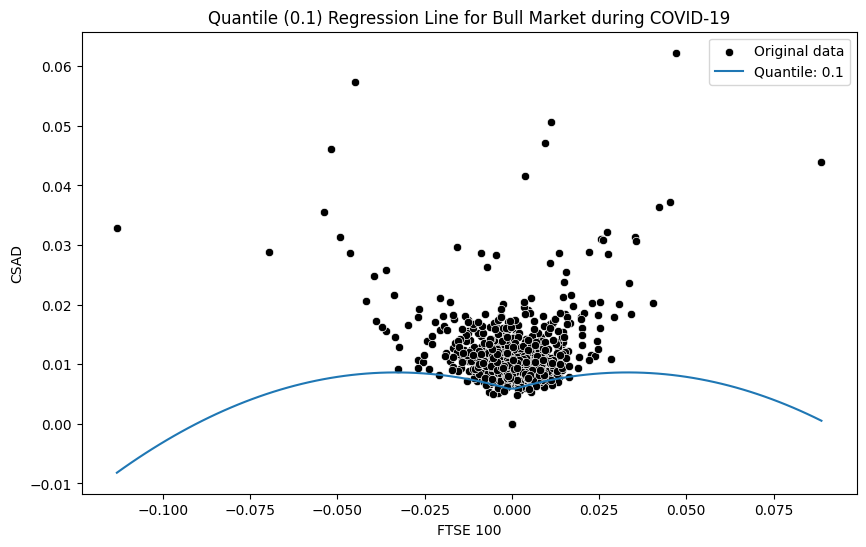

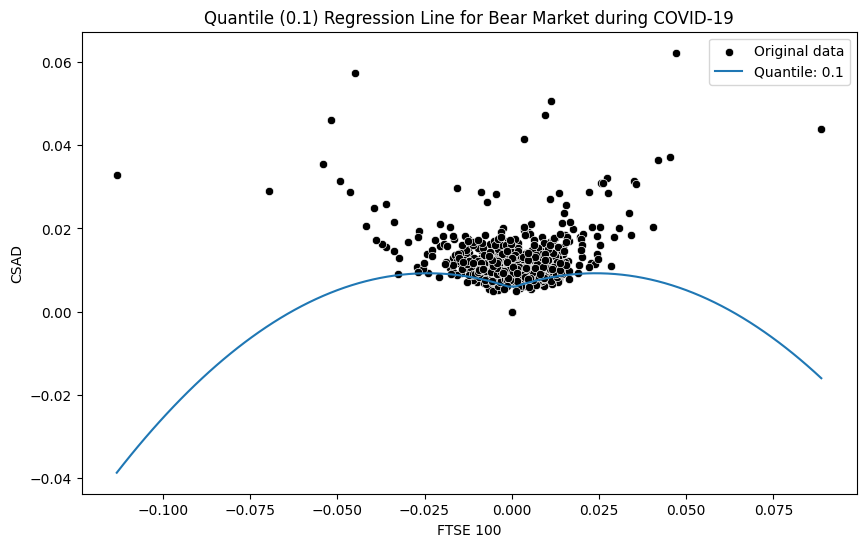

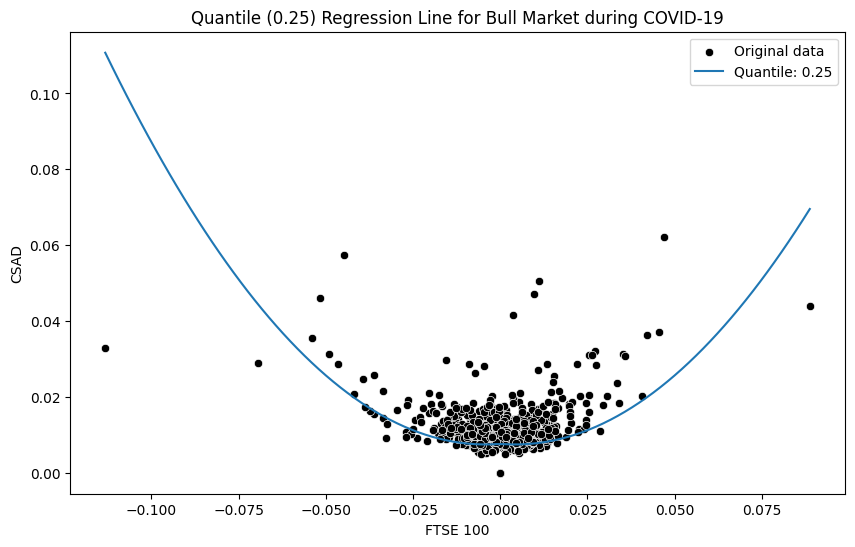

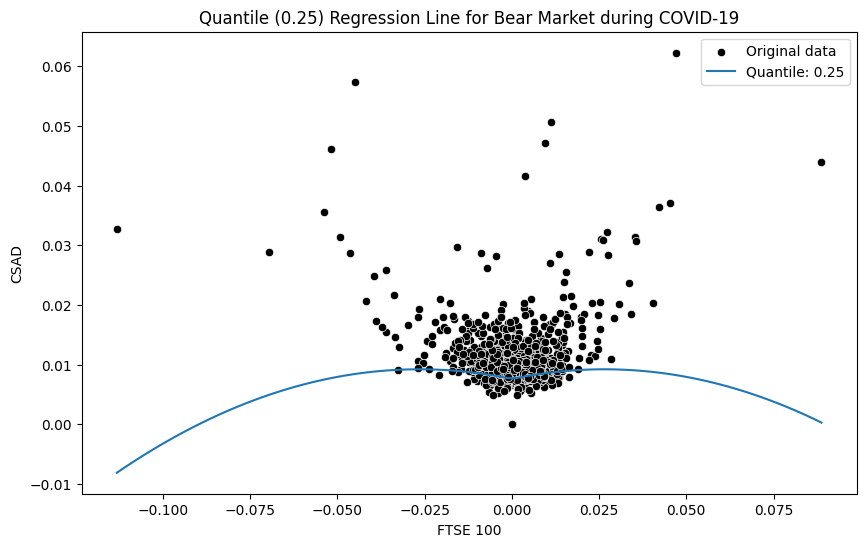

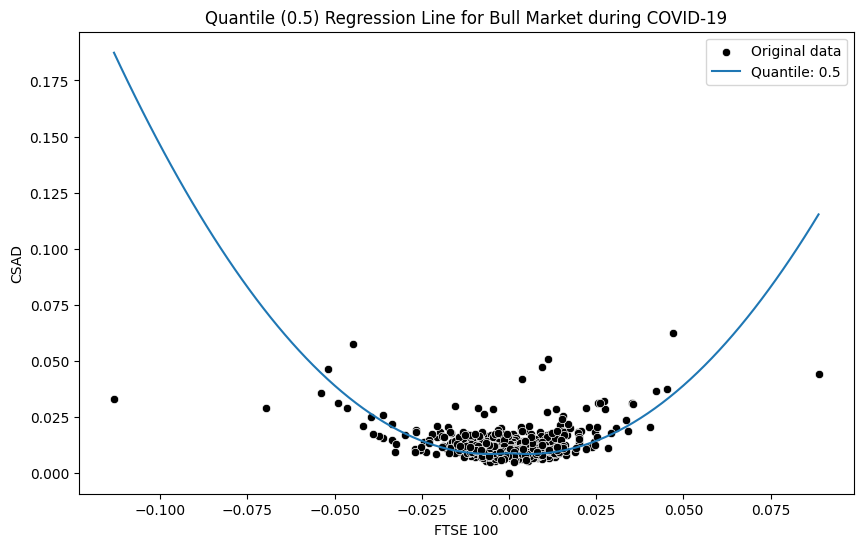

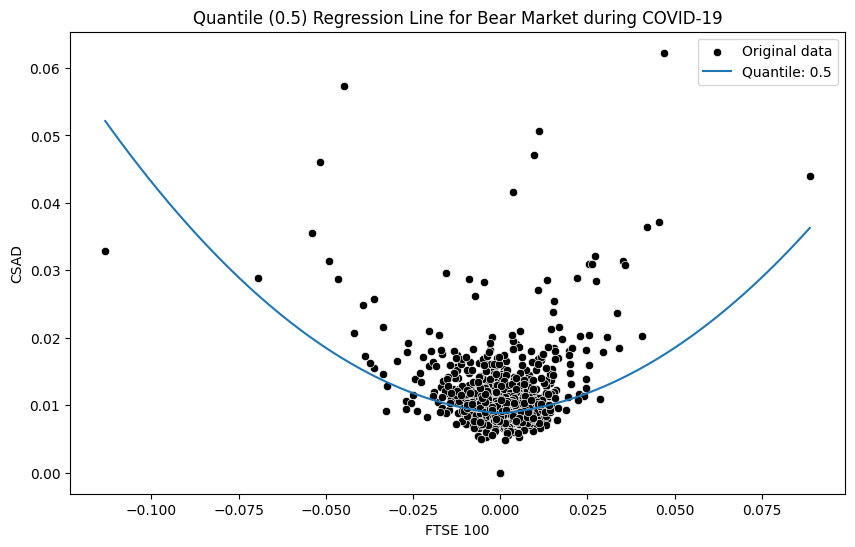

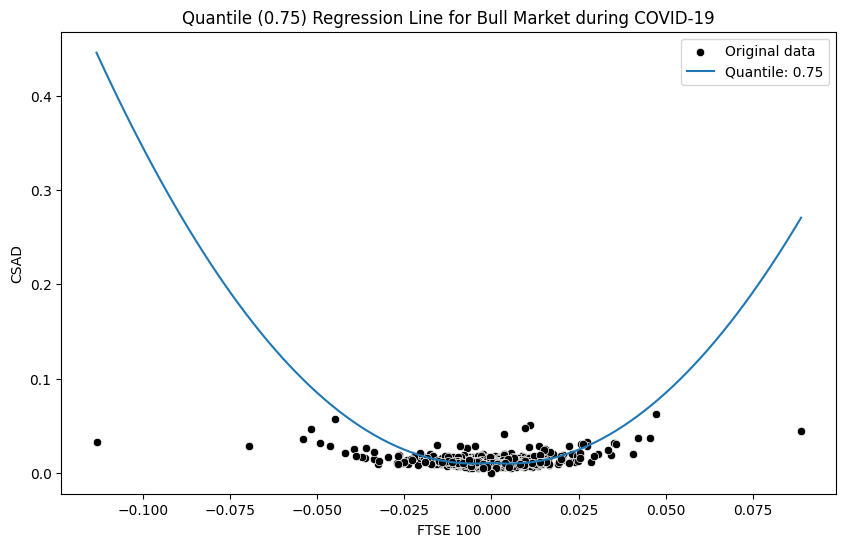

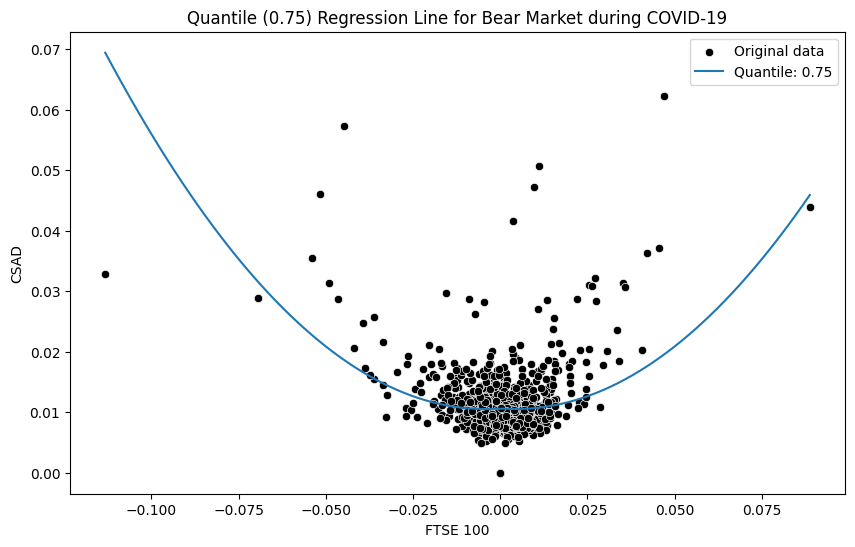

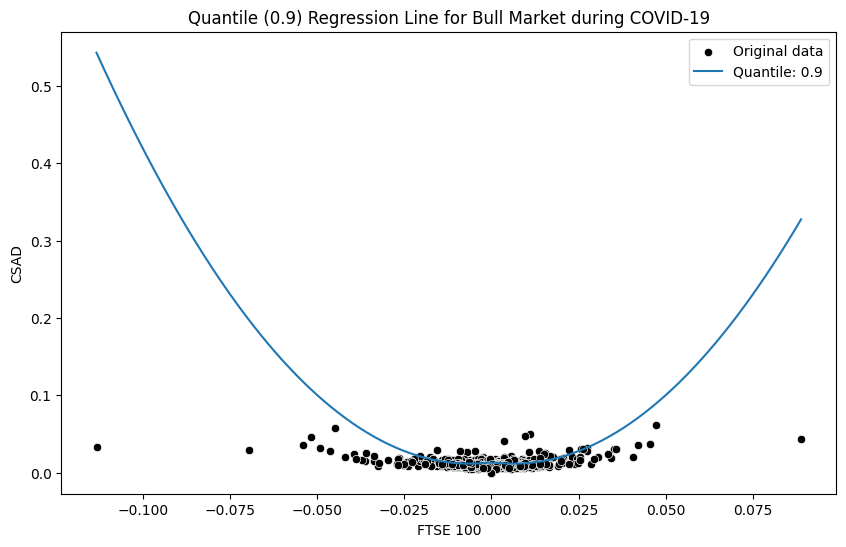

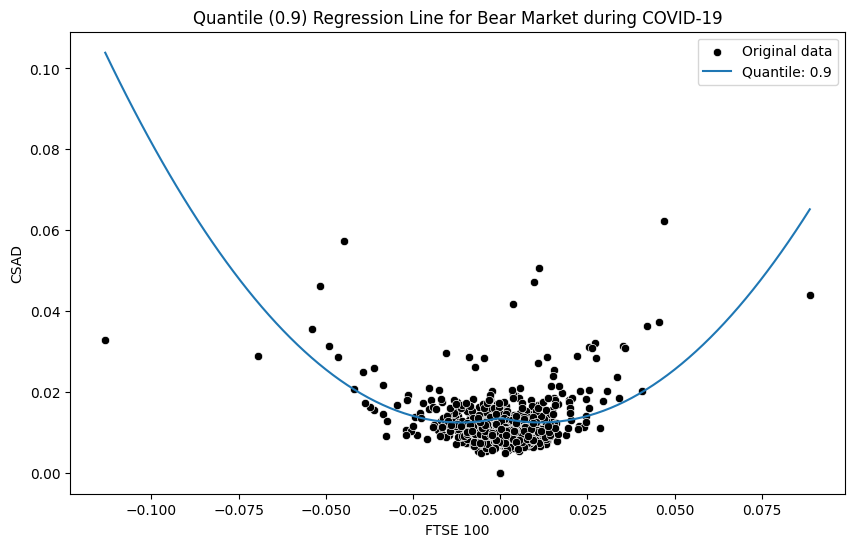

In [ ]:
# Function to plot separate figures for each quantile, up and down markets
def plot_quantile_regression_separate(x, y, results, quantiles, Yup, Ocovid):
    x_plot = np.linspace(x.min(), x.max(), 100)
    Ocovid_mean = (x_plot >= np.median(hmdf['Date'].astype('int64'))).astype(int)

    for q in quantiles:
        for market_condition, label in [(1, 'Bull Market'), (0, 'Bear Market')]:
            plt.figure(figsize=(10, 6))

            # Scatter plot of the original data
            sns.scatterplot(x=x, y=y, color='black', label='Original data')

            x_plot_poly = pd.DataFrame({
                '\u03B21': (market_condition) * Ocovid_mean * np.abs(x_plot),
                '\u03B22': (market_condition) * (1 - Ocovid_mean) * np.abs(x_plot),
                '\u03B23': (1 - market_condition) * Ocovid_mean * np.abs(x_plot),
                '\u03B24': (1 - market_condition) * (1 - Ocovid_mean) * np.abs(x_plot),
                '\u03B25': (market_condition) * Ocovid_mean * x_plot**2,
                '\u03B26': (market_condition) * (1 - Ocovid_mean) * x_plot**2,
                '\u03B27': (1 - market_condition) * Ocovid_mean * x_plot**2,
                '\u03B28': (1 - market_condition) * (1 - Ocovid_mean) * x_plot**2
            })

            x_plot_poly = sm.add_constant(x_plot_poly)
            y_pred = results[q].predict(x_plot_poly)
            sns.lineplot(x=x_plot, y=y_pred, label=f'Quantile: {q}')

            plt.xlabel('FTSE 100')
            plt.ylabel('CSAD')
            plt.title(f'Quantile ({q}) Regression Line for {label} during COVID-19')
            plt.legend()
            plt.show()

# Plotting function
plot_quantile_regression_separate(x, y, results, quantiles, Yup, Ocovid)